# ***1. CHUẨN BỊ TÀI NGUYÊN***

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
folder = '/content/gdrive/My Drive/Dataset/'

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(folder + 'Poland_car_price.csv')

# ***2. TỔNG QUAN DỮ LIỆU***

In [ ]:
df.head(5)

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

   Transmission        Type Doors_number  Colour Origin_country First_owner  \
0        Manual  small_cars          3.0    gray            NaN         NaN   
1        Manual       coupe          2.0  silver            NaN         NaN   
2     Automatic  small_cars          3.0  silver            NaN         NaN   
3        Manual  small_cars          3.0    gray            NaN         NaN   
4        Manual  small_cars          3.0    blue            NaN         NaN   

  First_registration_date  Offer_publication_date  \
0                     NaN                4/5/2021   
1                     NaN                3/5/2021   
2                     NaN                3/5/2021   
3                     NaN              30/04/2021   
4                     NaN              30/04/2021   

                                      Offer_location  \
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...   
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...   
2                   Warszawa, Mazowieckie, Białołęka   
3                                  Jaworzno, Śląskie   
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...   

                                            Features  
0                                                 []  
1                                                 []  
2  ['ABS', 'Electric front windows', 'Drivers air...  
3  ['ABS', 'Electric front windows', 'Drivers air...  
4  ['ABS', 'Electrically adjustable mirrors', 'Pa...  

[5 rows x 25 columns]

In [ ]:
print(f'Kích thước của bộ dữ liệu gồm: {df.shape[0]} dòng, {df.shape[1]} cột\n')
df.info()

Kích thước của bộ dữ liệu gồm: 208304 dòng, 25 cột

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emi

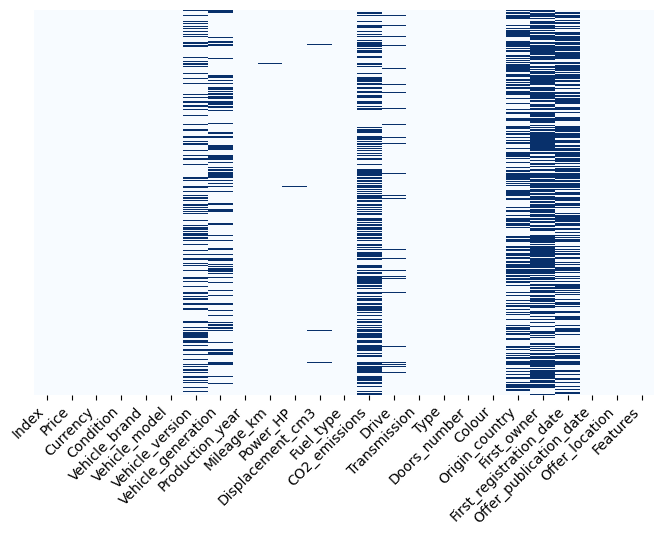

In [ ]:
# Tổng quan về missing value
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cmap="Blues", cbar=False, yticklabels=False)
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0.5, 0, 'Car')

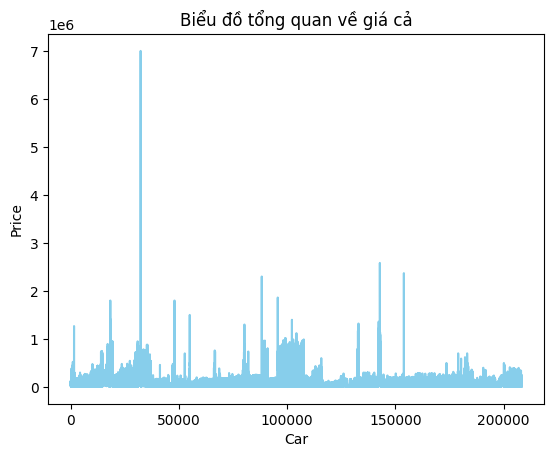

In [ ]:
# Xem tổng quan về giá:
plt.plot(df['Price'], color = 'Skyblue')
plt.title('Biểu đồ tổng quan về giá cả')
plt.ylabel('Price')
plt.xlabel('Car')

In [ ]:
# Xem tổng quan về giá:
x = df['Price'].describe().values/1000
y = df['Price'].describe().index
z = {j: i for i, j in zip(x,y)}
df_z = pd.DataFrame(list(z.items()), columns=['Stats', 'Values (In Thousand)'])
df_z

Stats  Values (In Thousand)
0  count            208.304000
1   mean             63.053834
2    std             86.659673
3    min              0.500000
4    25%             17.800000
5    50%             35.700000
6    75%             75.990000
7    max           6999.000000

<ipython-input-297-b2e0c38bce5a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



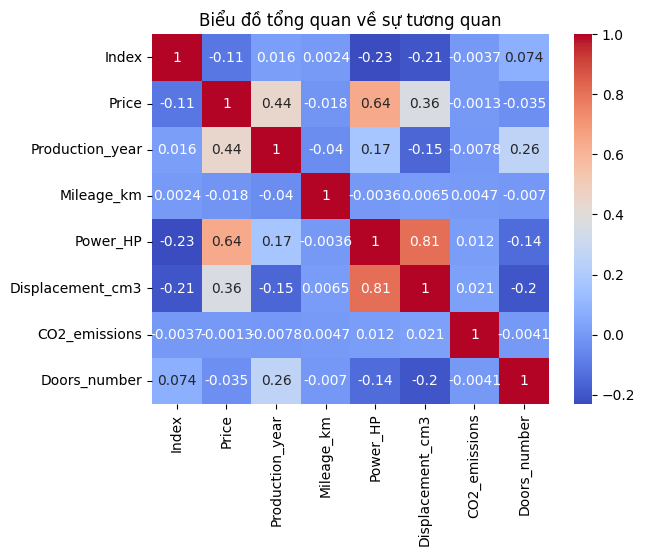

In [ ]:
# Tổng quan về độ tương quan
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Biểu đồ tổng quan về sự tương quan')
plt.show()

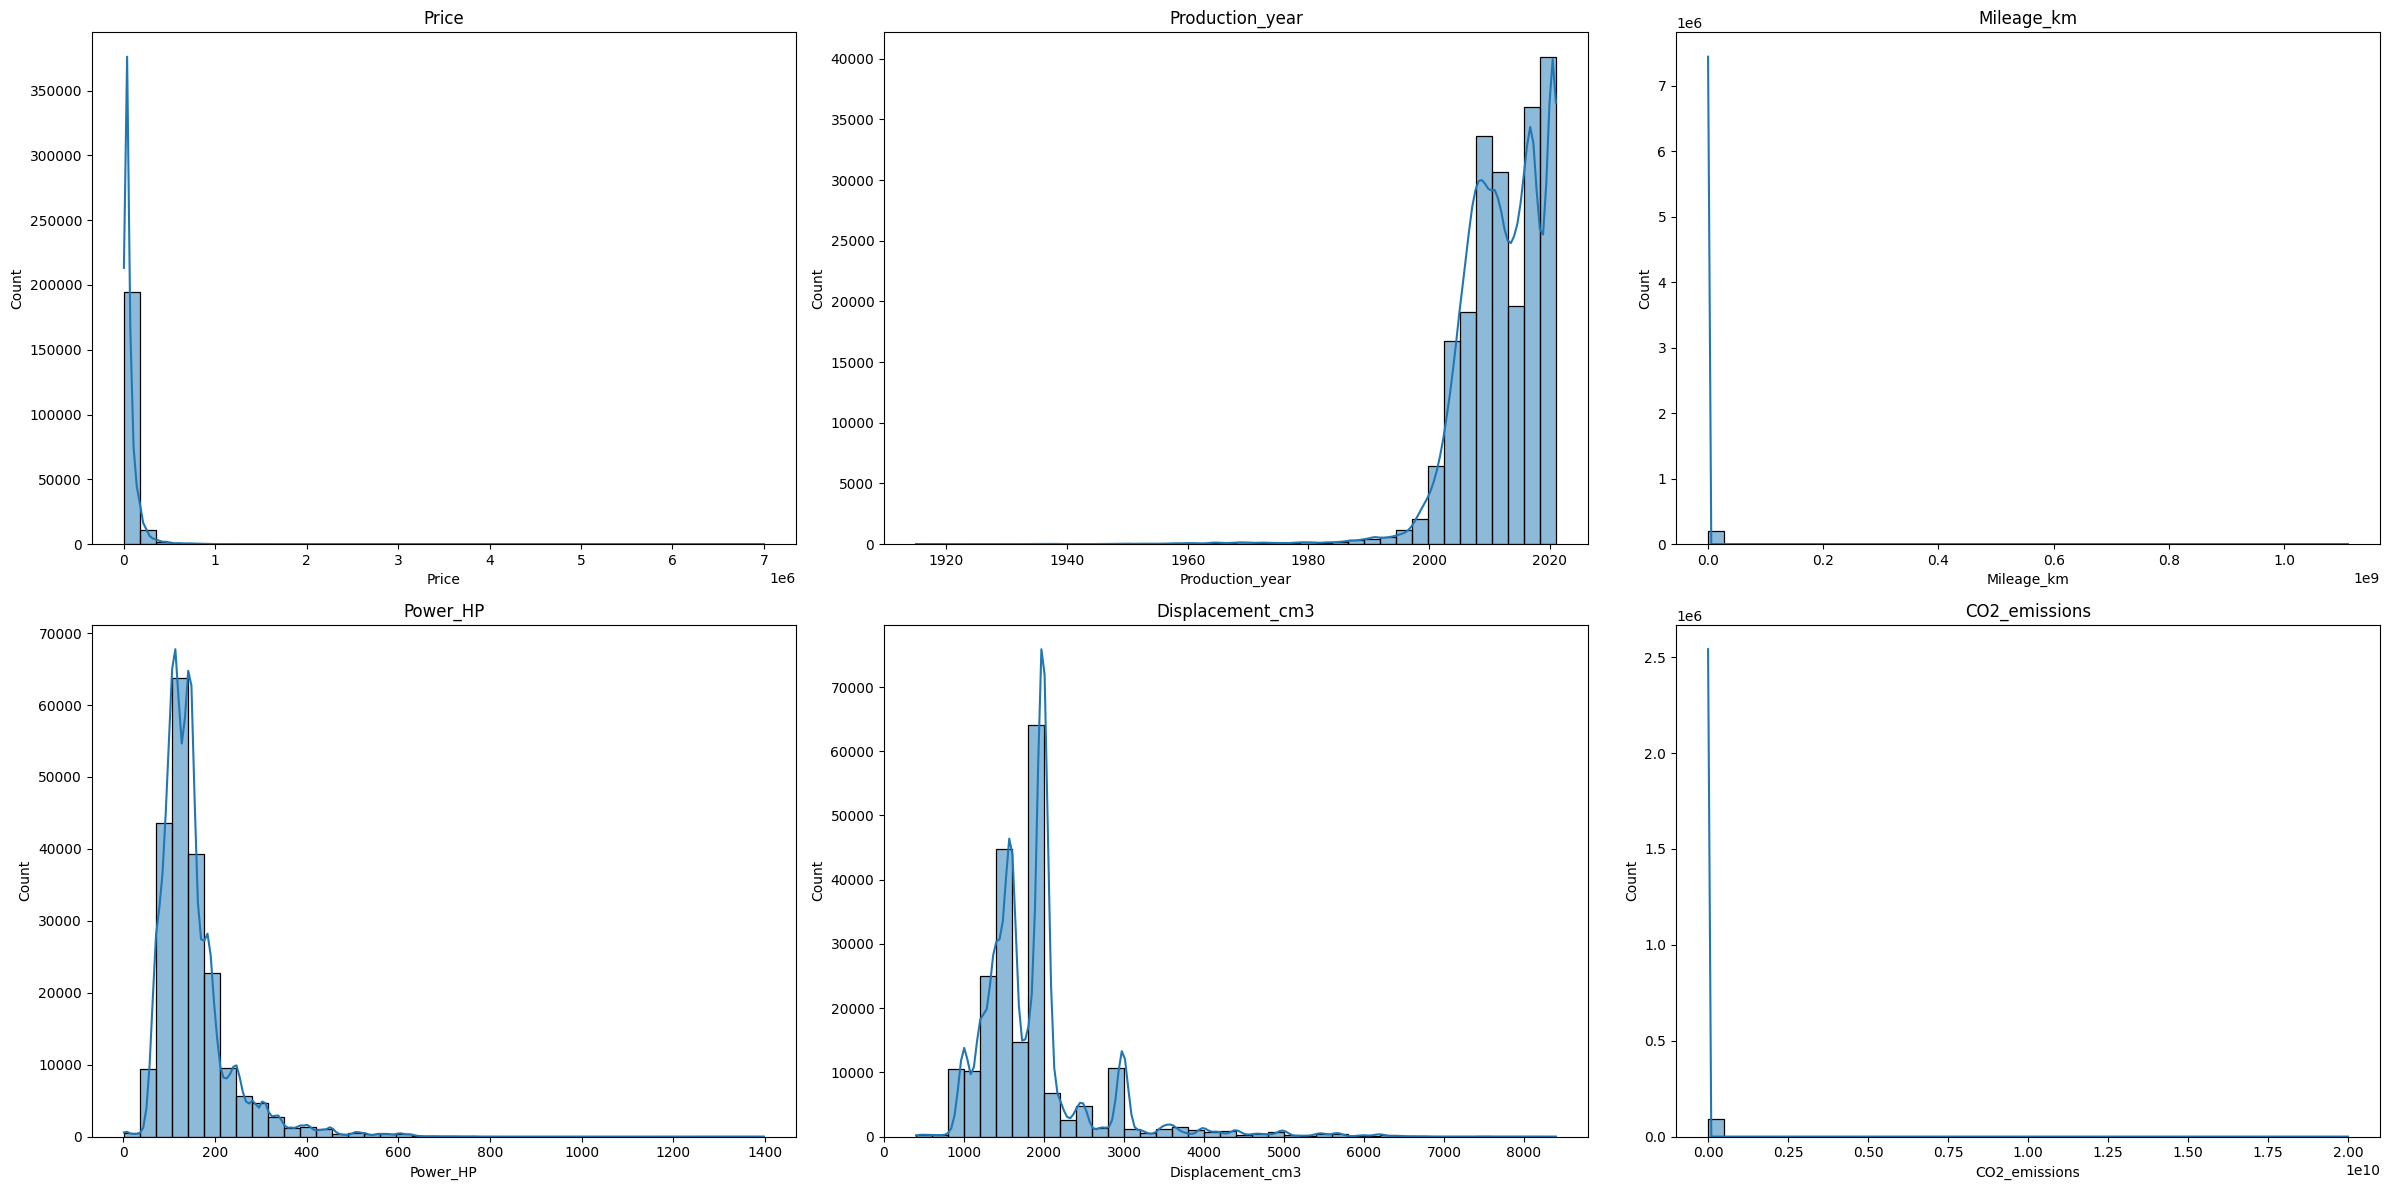

In [ ]:
# Xem sự tương quan giữa biến Price và các biến numeric
n_rows=2
n_cols=3
numeric_x = ["Price","Production_year","Mileage_km", "Power_HP","Displacement_cm3","CO2_emissions"]
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_rows*12,n_cols*4))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(numeric_x):
            ax_i = ax[r, c]
            col = numeric_x[i]
            sns.histplot(df[col],bins=40,kde=True, ax=ax_i)
            ax_i.set_title(f'{col}')
plt.tight_layout()

In [ ]:
for col in numeric_x:
  skew = df[col].skew()
  kurt = df[col].kurtosis()
  print(f"{col}: Độ lệch: {skew.round(2)}, đỉnh: {kurt.round(2)}")
  if skew < 0:
    print(f"=> phân phối lệch trái: {col}\n")
  elif skew > 0:
    print(f"=> phân phối lệch phải: {col}\n")

Price: Độ lệch: 7.52, đỉnh: 250.77
=> phân phối lệch phải: Price

Production_year: Độ lệch: -1.95, đỉnh: 11.84
=> phân phối lệch trái: Production_year

Mileage_km: Độ lệch: 310.34, đỉnh: 106902.72
=> phân phối lệch phải: Mileage_km

Power_HP: Độ lệch: 2.53, đỉnh: 10.55
=> phân phối lệch phải: Power_HP

Displacement_cm3: Độ lệch: 2.5, đỉnh: 9.46
=> phân phối lệch phải: Displacement_cm3

CO2_emissions: Độ lệch: 246.86, đỉnh: 63950.49
=> phân phối lệch phải: CO2_emissions



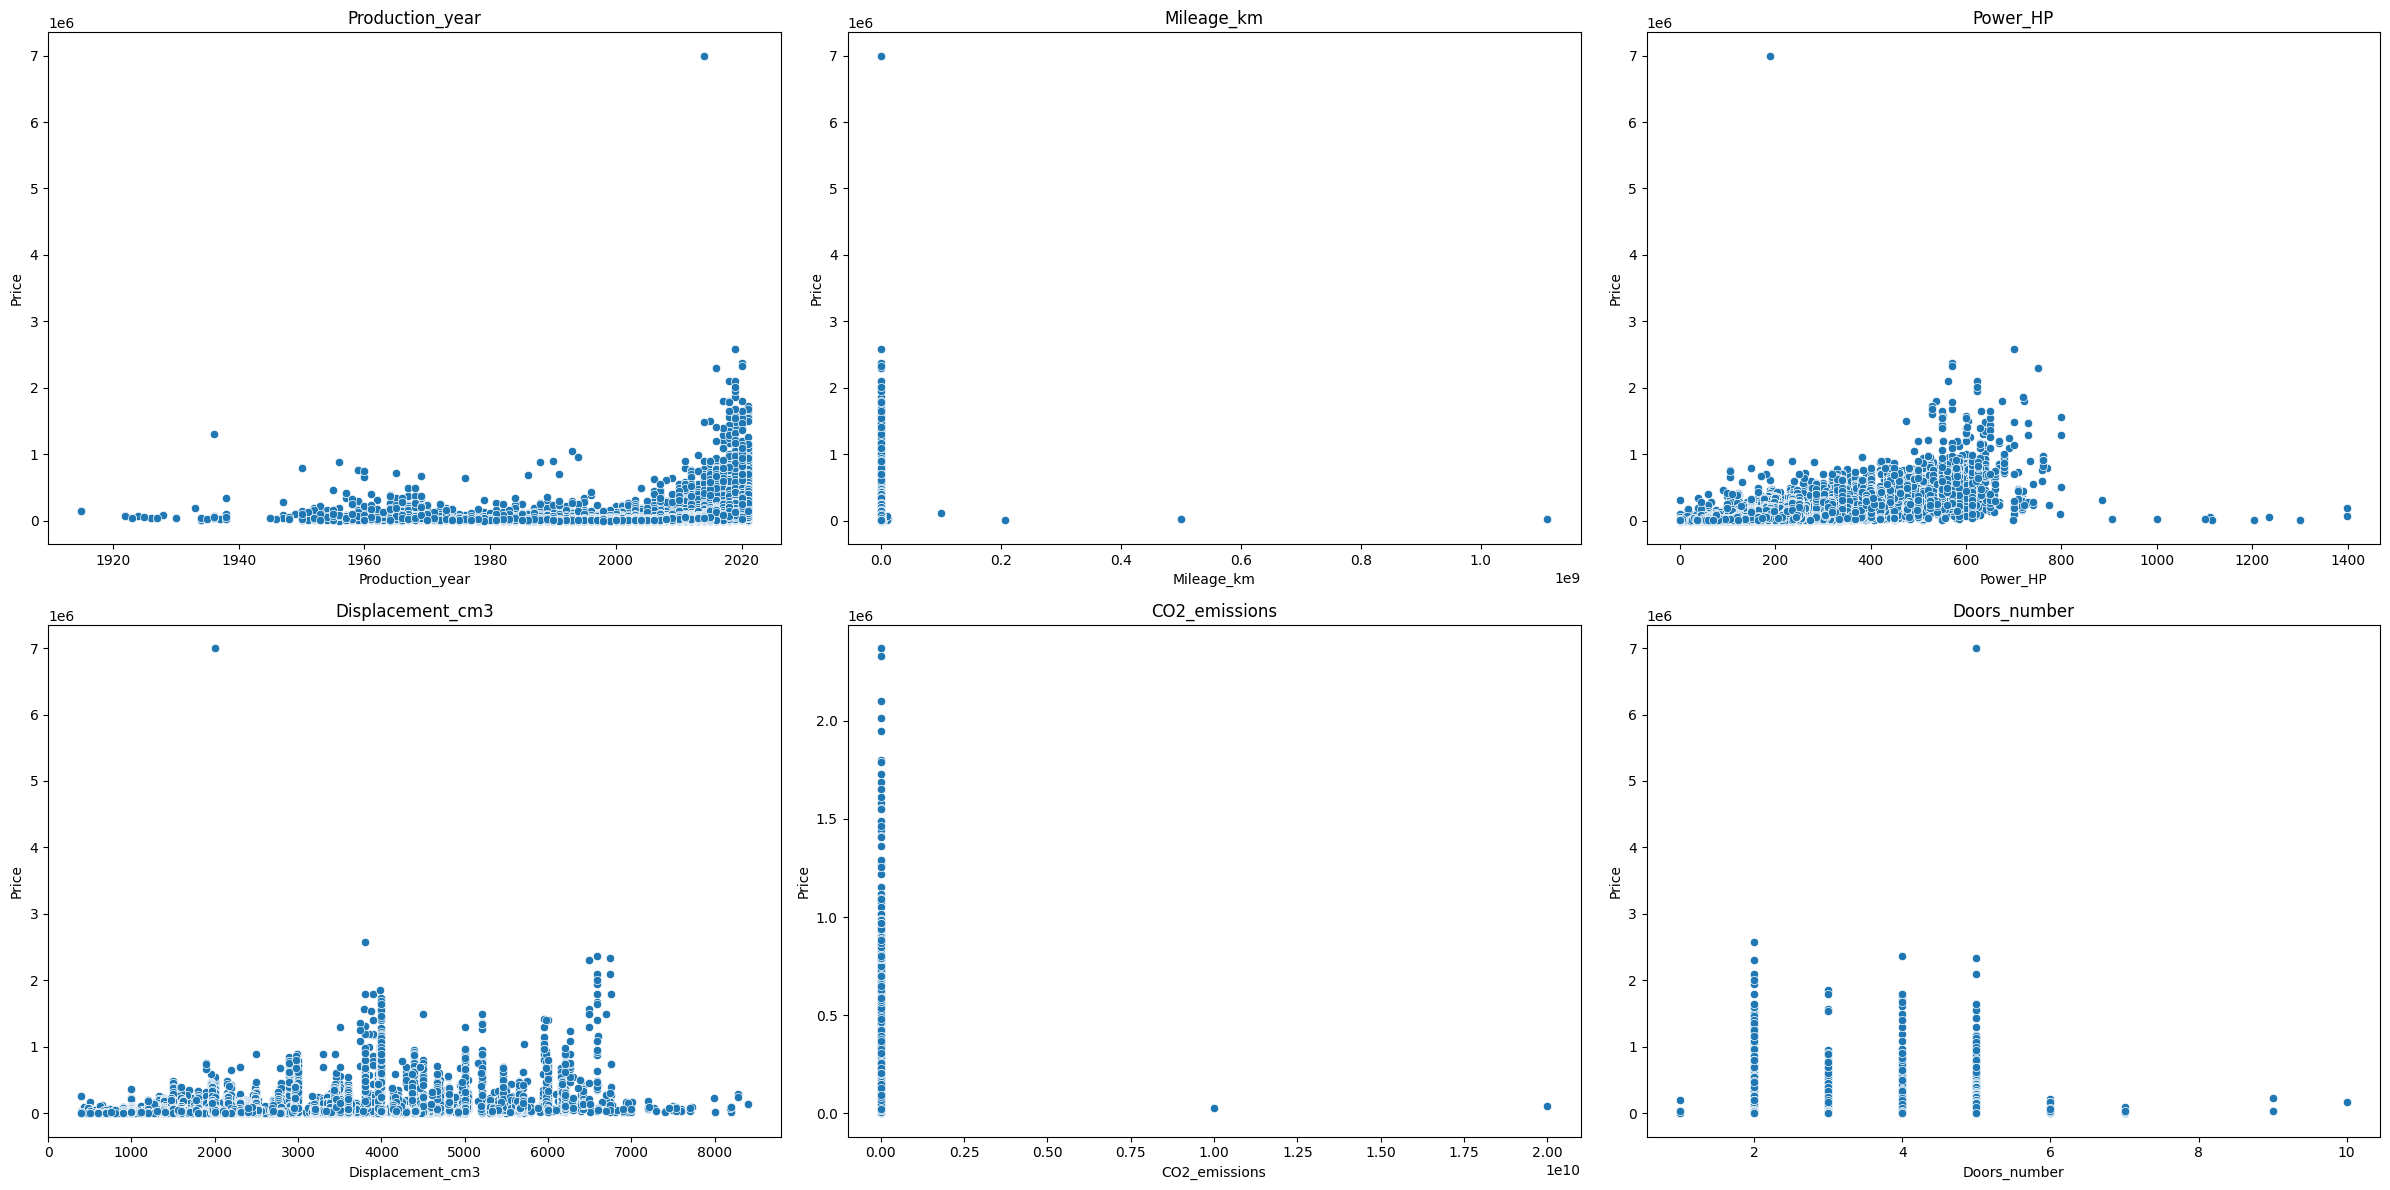

In [ ]:
# Xem sự tương quan giữa biến Price và các biến numeric
n_rows=2
n_cols=3
numeric_x = ["Production_year","Mileage_km", "Power_HP","Displacement_cm3","CO2_emissions","Doors_number"]
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_rows*12,n_cols*4))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(numeric_x):
            ax_i = ax[r, c]
            col = numeric_x[i]
            sns.scatterplot(x = col,y = 'Price',data =df, ax=ax_i)
            ax_i.set_title(f'{col}')
plt.tight_layout()

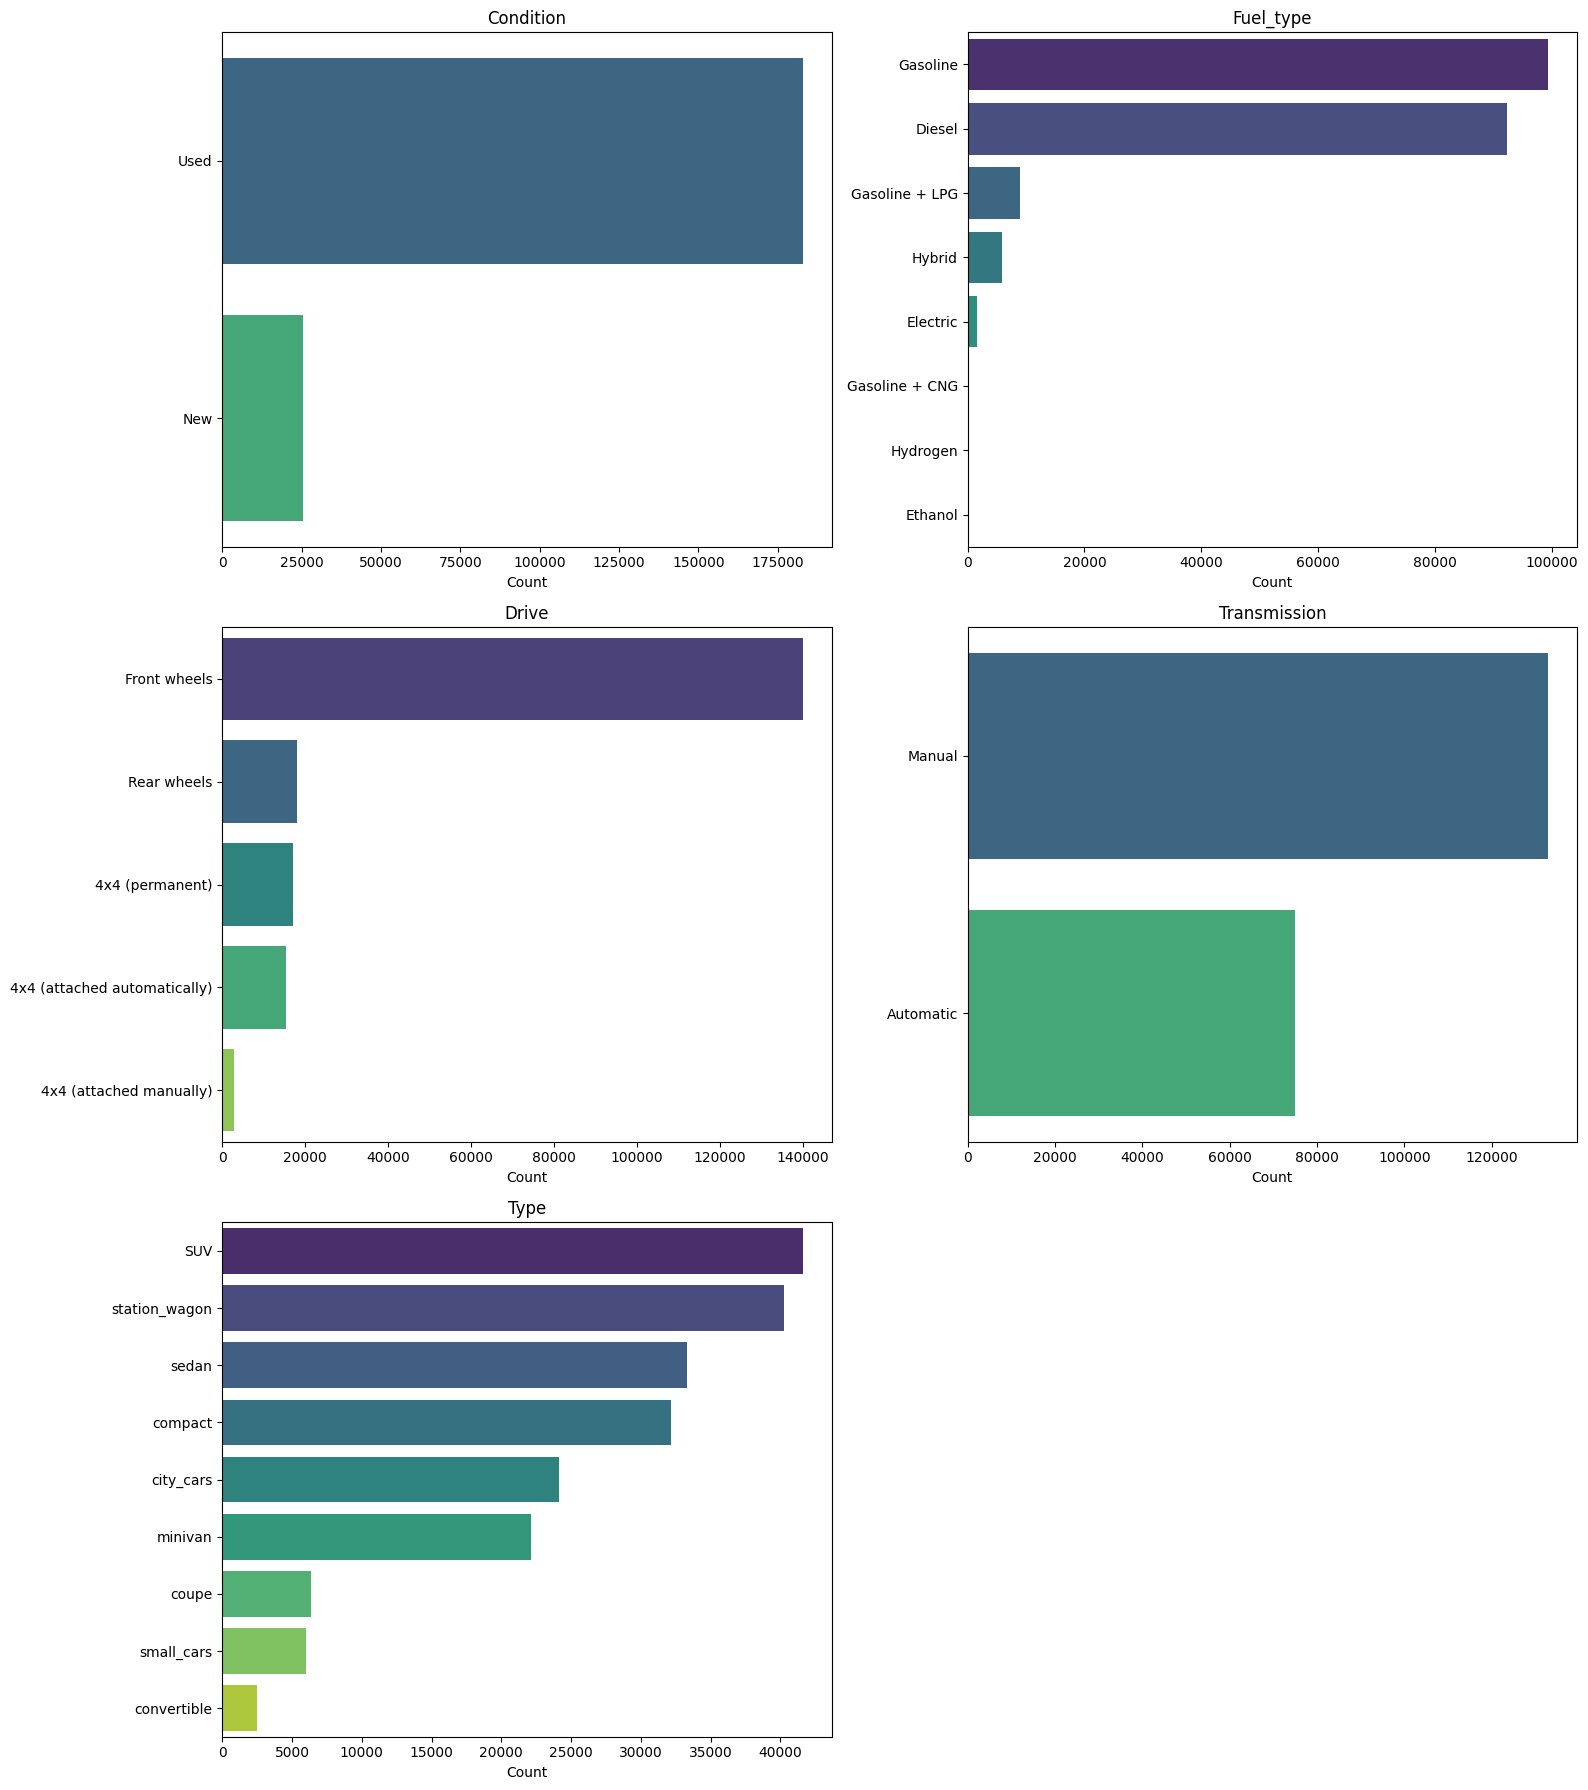

In [ ]:
# Tổng quan các biến phân loại
category_x = ["Condition", "Fuel_type", "Drive", "Transmission", "Type"]


n_rows = 3
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(category_x):
            ax_i = ax[r, c]
            col = category_x[i]


            order = df[col].value_counts().index
            sns.countplot(data=df, y=col, order=order, ax=ax_i, palette='viridis')

            ax_i.set_title(f'{col}')
            ax_i.set_xlabel('Count')
            ax_i.set_ylabel(None)


for a in ax.flat[-(n_cols - 1):]:
    a.set_visible(False)

plt.tight_layout()

plt.show()

# ***3. TIỀN XỬ LÍ DỮ LIỆU***

#### * KIỂM TRA GIÁ TRỊ TRÙNG LẶP

In [ ]:
# Kiểm tra các hàng trùng lặp
duplicate = df[df.duplicated()]
print('Các hàng bị trùng lặp:', len(duplicate))

Các hàng bị trùng lặp: 0


#### * HỢP LÝ HÓA ĐƠN VỊ TIỀN

In [ ]:
print(df['Currency'].value_counts())

PLN    208034
EUR       270
Name: Currency, dtype: int64


In [ ]:
df_EUR = df.loc[df['Currency'] == 'EUR']
for index, row in df_EUR.iterrows():
    df.at[index, 'Price'] = row['Price'] * 4.45

In [ ]:
df.drop(columns=['Currency'],axis=1,inplace=True)

#### * XỬ LÝ MISSING VALUE

In [ ]:
# Kiểm tra giá trị bị thiếu
df.isnull().sum()

Index                           0
Price                           0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

In [ ]:
# Xóa các cột dữ liệu không cần thiết
# Phần trăm các cột các dữ liệu bị thiếu
missing_val_over40 = []
for col in df:
    missing_value = df[col].isnull().sum()
    if missing_value > 0:
        missing_percentage = round(missing_value*100/df.shape[0],5)
        print(f"Phần trăm dữ liệu bị thiếu {col}: {missing_percentage} %")
        print("")
        if missing_percentage > 40:
            missing_val_over40.append(col)
print(f"""Các cột có phần trăm dữ liệu mất lớn (trên 40%):
{missing_val_over40}""")

Phần trăm dữ liệu bị thiếu Vehicle_version: 33.71131 %

Phần trăm dữ liệu bị thiếu Vehicle_generation: 29.01721 %

Phần trăm dữ liệu bị thiếu Mileage_km: 0.47191 %

Phần trăm dữ liệu bị thiếu Power_HP: 0.30868 %

Phần trăm dữ liệu bị thiếu Displacement_cm3: 0.94381 %

Phần trăm dữ liệu bị thiếu CO2_emissions: 54.85108 %

Phần trăm dữ liệu bị thiếu Drive: 7.2375 %

Phần trăm dữ liệu bị thiếu Transmission: 0.22995 %

Phần trăm dữ liệu bị thiếu Doors_number: 0.71386 %

Phần trăm dữ liệu bị thiếu Origin_country: 43.20224 %

Phần trăm dữ liệu bị thiếu First_owner: 68.75048 %

Phần trăm dữ liệu bị thiếu First_registration_date: 58.50056 %

Các cột có phần trăm dữ liệu mất lớn (trên 40%):
['CO2_emissions', 'Origin_country', 'First_owner', 'First_registration_date']


In [ ]:
# Xóa các thuộc tính có trên 25% tổng dữ liệu bị mất
df.drop(columns = missing_val_over40 + ['Index', 'Vehicle_version', 'Vehicle_generation'], axis=1,inplace=True)

In [ ]:
doors_type_ct = pd.crosstab(df['Doors_number'],df['Type'])
doors_type_ct

Type            SUV  city_cars  compact  convertible  coupe  minivan  sedan  \
Doors_number                                                                  
1.0               0          0        1            0      1        0      0   
2.0             137        259      189         2037   3744      120    207   
3.0             495       5204     3122          321   1089      150    100   
4.0            1163        347     1051           52    520     2898  19791   
5.0           39461      18132    27605           56    954    18760  12924   
6.0               3          0        0            0      0       31      1   
7.0               3          0        0            0      0        5      0   
9.0               0          0        0            0      0        1      0   
10.0              0          0        0            0      0        1      0   

Type          small_cars  station_wagon  
Doors_number                             
1.0                    2              0  
2.0                  451             71  
3.0                 2288             76  
4.0                   66           1987  
5.0                 3078          37846  
6.0                    0             16  
7.0                    0              0  
9.0                    1              0  
10.0                   0              0

In [ ]:
# Xử lý missing value của cột Doors_number
doors_type_mode = dict()
for car in doors_type_ct:
    doors_mode = doors_type_ct[car].idxmax()
    doors_type_mode[car] = doors_mode
doors_type_mode

{'SUV': 5.0,
 'city_cars': 5.0,
 'compact': 5.0,
 'convertible': 2.0,
 'coupe': 2.0,
 'minivan': 5.0,
 'sedan': 4.0,
 'small_cars': 5.0,
 'station_wagon': 5.0}

In [ ]:
df['Doors_number'] = df['Doors_number'].fillna(df['Type'].map(doors_type_mode))

In [ ]:
# Xóa các dòng có giá trị là 9, 10 hoặc 1 trong cột 'Doors_number' vì không hợp lệ
df = df[~df['Doors_number'].isin([9, 10, 7, 1])]

In [ ]:
median_mileage = df['Mileage_km'].median()
# Thay thế giá trị bị thiếu bằng giá trị trung vị
df['Mileage_km'].fillna(median_mileage, inplace=True)
df['Mileage_km']

<ipython-input-200-647bbb9f0187>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0              1.0
1          59000.0
2          52000.0
3          29000.0
4            600.0
            ...   
208298      6000.0
208300     63518.0
208301     11880.0
208302    100000.0
208303     20056.0
Name: Mileage_km, Length: 208289, dtype: float64

In [ ]:
# Thay thế giá trị bị thiếu bằng giá trị xuất hiện nhiều nhất
df['Power_HP'].fillna(df['Power_HP'].mode()[0], inplace=True)
df['Power_HP']

<ipython-input-201-6cbd05075139>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         145.0
1          75.0
2         180.0
3         160.0
4         165.0
          ...  
208298    150.0
208300     70.0
208301     60.0
208302     36.0
208303     70.0
Name: Power_HP, Length: 208289, dtype: float64

In [ ]:
# Thay thế giá trị bị thiếu bằng giá trị trung bình
df['Displacement_cm3'].fillna(df['Displacement_cm3'].mode()[0], inplace=True)
df['Displacement_cm3']

<ipython-input-202-a1f696e4676a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         1400.0
1         1100.0
2         1368.0
3         1368.0
4         1368.0
           ...  
208298     750.0
208300    2120.0
208301    2120.0
208302    2200.0
208303    2120.0
Name: Displacement_cm3, Length: 208289, dtype: float64

In [ ]:
# Thay thế giá trị bị thiếu bằng giá trị phổ biến nhất
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['Transmission']

<ipython-input-203-71b1e44729b7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0            Manual
1            Manual
2         Automatic
3            Manual
4            Manual
            ...    
208298       Manual
208300       Manual
208301       Manual
208302       Manual
208303       Manual
Name: Transmission, Length: 208289, dtype: object

In [ ]:
# # Xử lý missing value của cột Drive
df['Drive'].fillna(df['Drive'].value_counts().idxmax(),inplace=True)

In [ ]:
df['Drive']

0         Front wheels
1         Front wheels
2         Front wheels
3         Front wheels
4         Front wheels
              ...     
208298    Front wheels
208300     Rear wheels
208301    Front wheels
208302    Front wheels
208303    Front wheels
Name: Drive, Length: 208289, dtype: object

In [ ]:
# Recheck
df.isnull().sum()

Price                     0
Condition                 0
Vehicle_brand             0
Vehicle_model             0
Production_year           0
Mileage_km                0
Power_HP                  0
Displacement_cm3          0
Fuel_type                 0
Drive                     0
Transmission              0
Type                      0
Doors_number              0
Colour                    0
Offer_publication_date    0
Offer_location            0
Features                  0
dtype: int64

#### * CHUYỂN ĐỔI VÀ PHÂN LOẠI KIỂU DỮ LIỆU

In [ ]:
#Chuyển cột 'Offer_publication_date' sang dạng datetime
df['Offer_publication_date'] = pd.to_datetime(df['Offer_publication_date'], format='%d/%m/%Y')
df['Production_year'] = pd.to_datetime(df['Production_year'], format='%Y').dt.year
datetime_features = ['Offer_publication_date', 'Production_year']

In [ ]:
df['Doors_number'] = df['Doors_number'].astype('object')

In [ ]:
def dtype_seperator(df,is_numeric=True):
    main_features = [col for col in df.columns if df[col].dtype != 'datetime64[ns]']
    numerical_features = []
    categorical_features = []

    for column in main_features:
        if df[column].dtype.kind in 'biufc':
            numerical_features.append(column)
        else:
            categorical_features.append(column)
    if is_numeric:
        return numerical_features
    else:
        return categorical_features

In [ ]:
numerical_features = dtype_seperator(df)

In [ ]:
categorical_features = dtype_seperator(df,is_numeric=False)

In [ ]:
for col in numerical_features:
    if col == 'Doors_number':
        categorical_features.append(col)
numerical_features = [col for col in numerical_features if col not in ['Doors_number','Production_year']]

In [ ]:
print(f"Các cột có kiểu dữ liệu numerical là: {numerical_features}")
print(f"Các cột có kiểu dữ liệu categorical là: {categorical_features}")
print(f"Các cột có kiểu dữ liệu datetime là: {datetime_features}")

Các cột có kiểu dữ liệu numerical là: ['Price', 'Mileage_km', 'Power_HP', 'Displacement_cm3']
Các cột có kiểu dữ liệu categorical là: ['Condition', 'Vehicle_brand', 'Vehicle_model', 'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour', 'Offer_location', 'Features']
Các cột có kiểu dữ liệu datetime là: ['Offer_publication_date', 'Production_year']


### Kiêm tra và xử lí outlier

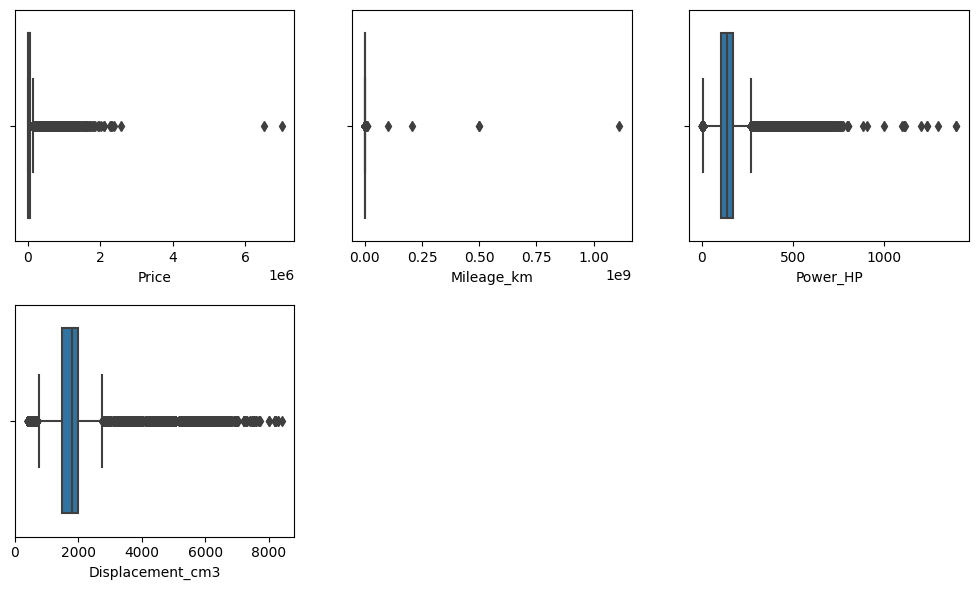

In [ ]:
cols = [element for element in numerical_features]
n_rows=2
n_cols=3
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_rows*5,n_cols*2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.boxplot(data=df,x=cols[i],ax=ax_i)
plt.tight_layout()
ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)

In [ ]:
def iqr(df,features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

In [ ]:
def remove_outliers(df,features, multiplier=1.5):
    Q1, Q3, IQR = iqr(df,features)

    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)

    # Remove outliers
    df_clean = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]
    return df_clean

In [ ]:
# Áp dụng hàm vào trong dataframe
df = remove_outliers(df,numerical_features,multiplier = 3)

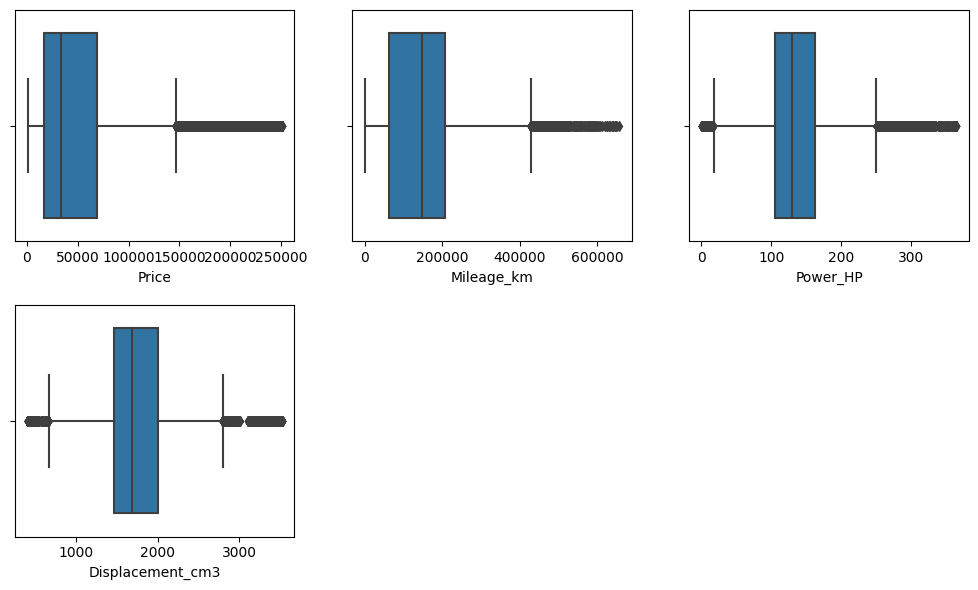

In [ ]:
cols = [element for element in numerical_features]
n_rows=2
n_cols=3
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_rows*5,n_cols*2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.boxplot(data=df,x=cols[i],ax=ax_i)
plt.tight_layout()
ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195226 entries, 0 to 208303
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Price                   195226 non-null  float64       
 1   Condition               195226 non-null  object        
 2   Vehicle_brand           195226 non-null  object        
 3   Vehicle_model           195226 non-null  object        
 4   Production_year         195226 non-null  int64         
 5   Mileage_km              195226 non-null  float64       
 6   Power_HP                195226 non-null  float64       
 7   Displacement_cm3        195226 non-null  float64       
 8   Fuel_type               195226 non-null  object        
 9   Drive                   195226 non-null  object        
 10  Transmission            195226 non-null  object        
 11  Type                    195226 non-null  object        
 12  Doors_number            195226

# ***4. PHÂN TÍCH KHÁM PHÁ DỮ LIỆU***

Lưu bản nháp của bộ dữ liệu sau khi đã xử lí để phục vụ cho mô hình, việc thêm bớt, thay đổi thuộc tính có thể gây ảnh hưởng đến mô hình sau này.

In [ ]:
df_processed = df.copy()

### **4.1 Thao tác thuộc tính**

#### * THÊM THUỘC TÍNH VÀ XỬ LÝ CHUỖI

In [ ]:
df['Vehicle'] = df['Vehicle_brand'] + ' ' + df['Vehicle_model']
categorical_features.append('Vehicle')

In [ ]:
df.drop(columns=['Vehicle_model'],inplace=True)
categorical_features = [element for element in categorical_features if element != 'Vehicle_model']

In [ ]:
df['Features'] = df['Features'].replace('[]', 'No Features')
df['Features'] = df['Features'].str.strip('[]')

In [ ]:
df[['Features']]

Features
0                                             No Features
1                                             No Features
2       'ABS', 'Electric front windows', 'Drivers airb...
3       'ABS', 'Electric front windows', 'Drivers airb...
4       'ABS', 'Electrically adjustable mirrors', 'Pas...
...                                                   ...
208298                                        No Features
208300                                        No Features
208301                                        No Features
208302                                        No Features
208303                                        No Features

[195226 rows x 1 columns]

In [ ]:
!pip install unidecode

In [ ]:
from unidecode import unidecode
df['Offer_location'] = df['Offer_location'].apply(lambda x: unidecode(x))

In [ ]:
# List of Polish cities
polish_location = [
    "Warsawa", "Krakow", "Lodz", "Wroclaw", "Poznan", "Gdansk", "Szczecin",
    "Bydgoszcz", "Lublin", "Bialystok", "Katowice", "Gdynia", "Czestochowa",
    "Radom", "Sosnowiec", "Torun", "Kielce", "Gliwice", "Zabrze", "Bytom",
    "Bielsko-Biala", "Olsztyn", "Rzeszow", "Ruda Slaska", "Rybnik", "Nowe Tychy",
    "Dabrowa Gornicza", "Plock", "Elblag", "Opole", "Walbrzych", "Wloclawek",
    "Tarnow", "Chorzow", "Kalisz", "Koszalin", "Legnica", "Grudziadz", "Jaworzno",
    "Slupsk", "Jastrzebie Zdroj", "Nowy Sacz", "Jelenia Gora", "Konin",
    "Piotrkow Trybunalski", "Inowroclaw", "Lubin", "Siedlce", "Piekary Slaskie",
    "Myslowice", "Ostrowiec Swietokrzyski", "Siemianowice Slaskie", "Ostrow Wielkopolski",
    "Suwalki", "Gniezno", "Stargard", "Glogow", "Wejherowo", "Przemysl", "Zamosc",
    "Leszno", "Lomza", "Chelm", "Tomaszow Mazowiecki", "Pruszkow", "Stalowa Wola",
    "Zgierz", "Starachowice", "Skarzysko-Kamienna", "Tarnowskie Gory", "Kedzierzyn-Kozle",
    "Leczyca", "Mielec", "Tczew", "Swidnica", "Pabianice", "Sochaczew", "Otwock",
    "Swinoujscie", "Belchatow", "Swarzedz", "Bedzin", "Zory", "Krosno", "Jaworzno",
    "Biala Podlaska", "Kutno", "Nowa Sol", "Pila", "Sieradz", "Zory", "Swietochlowice",
    "Ostroleka", "Siemiatycze", "Zdunska Wola", "Legionowo", "Turek", "Myszkow",
    "Nysa", "Kolobrzeg", "Gostyn", "Boleslawiec", "Olawa", "Bierun", "Zlotow",
    "Grodzisk Mazowiecki", "Wadowice"
]

In [ ]:
print(len(polish_location))

107


In [ ]:
def replace_city(location):
    for city in polish_location:
        if city in location:
            return city
    return location

def extract_province(address):
    match = re.search(r',\s*([^,]+?)\s*(?:\(|$)', address)
    return match.group(1).strip() if match else ''

extracted_phrases = [extract_province(addr) for addr in df['Offer_location']]
polish_location.extend(extracted_phrases)
df['Offer_location'] = df['Offer_location'].apply(replace_city)

In [ ]:
# Replace những giá trị không xử lí được bằng mode
df['Offer_location'] = df['Offer_location'].replace(' ', df['Offer_location'].mode()[0])

#### * RỜI RẠC HÓA DỮ LIỆU

In [ ]:
df['Production_period'] = pd.cut(df['Production_year'],
                                 bins = [df['Production_year'].min(),2000,df['Production_year'].max()],
                                 labels = ['Before 2000','After 2000'])
categorical_features.append('Production_period')

In [ ]:
regions = {
    "North": [
        "Pomorskie", "Gdansk", "Gdynia", "Sopot", "Tczew", "Slupsk", "Wejherowo",
        "Kujawsko-pomorskie", "Bydgoszcz", "Torun", "Wloclawek",
        "Warminsko-mazurskie", "Olsztyn", "Elblag", "Sopot"
        "Zachodniopomorskie", "Szczecin", "Koszalin", "Swinoujscie", "Stargard", "Kolobrzeg"
    ],
    "West": [
        "Wielkopolskie", "Poznan", "Kalisz", "Konin", "Gniezno", "Pila", "Ostrów Wielkopolski",
        "Ostrow Wielkopolsk",
        "Lubuskie", "Zielona Góra", "Gorzów Wielkopolski",
        "Dolnoslaskie", "Wroclaw", "Legnica", "Walbrzych", "Jelenia Gora", "Lubin", "Swidnica",
        "Gorzów Wielkopolski"
    ],
    "South": [
        "Malopolskie", "Krakow", "Nowy Sacz", "Tarnow", "Wadowice",
        "Slaskie", "Katowice", "Czestochowa", "Sosnowiec", "Gliwice", "Zabrze", "Bytom", "Ruda Slaska",
        "Chorzow", "Rybnik", "Tychy", "Dabrowa Gornicza", "Jaworzno", "Piekary Slaskie", "Bierun",
        "Myslowice", "Zory", "Siemianowice Slaskie",
        "Podkarpackie", "Rzeszow", "Przemysl", "Mielec", "Sanok", "Krosno",
        "Swietokrzyskie", "Kielce", "Ostrowiec Swietokrzyski",
        "Opolskie", "Opole", "Tychy", "Bielsko-Biala", "Bedzin"
    ],
    "East": [
        "Lubelskie", "Lublin", "Zamosc", "Chelm", "Biala Podlaska",
        "Podlaskie", "Bialystok", "Lomza", "Suwalki", "Siemiatycze", "Sanok",
        "Rembertow"
    ],
    "Central": [
        "Mazowieckie", "Warsaw", "Mokotow", "Bialoleka", "Wlochy", "Wola", "Ursynow", "Bemowo",
        "Targowek", "Bielany", "Ursus", "Praga-Poludnie", "Srodmiescie", "Otwock", "Piaseczno", "Radom", "Siedlce", "Plock", "Sochaczew",
        "Grodzisk Mazowiecki", "Legionowo","Lodzkie", "Lodz", "Piotrków Trybunalski",
        "Piotrków Trybunalski","Skierniewice", "Turek"
    ]
}


In [ ]:
def map_to_region(index):
    for region, indices in regions.items():
        if index in indices:
            return region
    return 'Unknown'

df['Offer_region'] = df['Offer_location'].apply(map_to_region)
categorical_features.append('Offer_region')

In [ ]:
df['Offer_region'].replace('Unknown',df['Offer_region'].mode()[0],inplace=True)

#### * TÁI THIẾT LẬP THỨ TỰ

In [ ]:
new_order = ['Price',
 'Condition',
 'Vehicle_brand',
 'Vehicle',
 'Mileage_km',
 'Power_HP',
 'Displacement_cm3',
 'Fuel_type',
 'Drive',
 'Transmission',
 'Type',
 'Doors_number',
 'Colour',
 'Production_year',
 'Production_period',
 'Offer_publication_date',
 'Offer_location',
 'Offer_region',
 'Features'
 ]

In [ ]:
df = df[new_order]

In [ ]:
# Recheck
print(f"Các cột có kiểu dữ liệu numerical là: {numerical_features}")
print(f"""Các cột có kiểu dữ liệu categorical là:
{categorical_features}""")
print(f"Các cột có kiểu dữ liệu datetime là: {datetime_features}")

Các cột có kiểu dữ liệu numerical là: ['Price', 'Mileage_km', 'Power_HP', 'Displacement_cm3']
Các cột có kiểu dữ liệu categorical là:
['Condition', 'Vehicle_brand', 'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour', 'Offer_location', 'Features', 'Vehicle', 'Production_period', 'Offer_region']
Các cột có kiểu dữ liệu datetime là: ['Offer_publication_date', 'Production_year']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195226 entries, 0 to 208303
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Price                   195226 non-null  float64       
 1   Condition               195226 non-null  object        
 2   Vehicle_brand           195226 non-null  object        
 3   Vehicle                 195226 non-null  object        
 4   Mileage_km              195226 non-null  float64       
 5   Power_HP                195226 non-null  float64       
 6   Displacement_cm3        195226 non-null  float64       
 7   Fuel_type               195226 non-null  object        
 8   Drive                   195226 non-null  object        
 9   Transmission            195226 non-null  object        
 10  Type                    195226 non-null  object        
 11  Doors_number            195226 non-null  object        
 12  Colour                  195226



### **4.2 Phân tích đơn biến**


#### **4.2.1 Phân tích biến định lượng**

In [ ]:
df[numerical_features].describe()

Price     Mileage_km       Power_HP  Displacement_cm3
count  195226.000000  195226.000000  195226.000000     195226.000000
mean    50777.184098  141785.731683     138.259202       1757.378182
std     48284.398447   95616.596719      50.472770        468.084447
min       585.000000       1.000000       1.000000        400.000000
25%     16900.000000   61200.000000     105.000000       1461.000000
50%     32999.000000  149000.000000     130.000000       1686.000000
75%     68900.000000  208239.000000     163.000000       1995.000000
max    250600.000000  657000.000000     365.000000       3518.000000

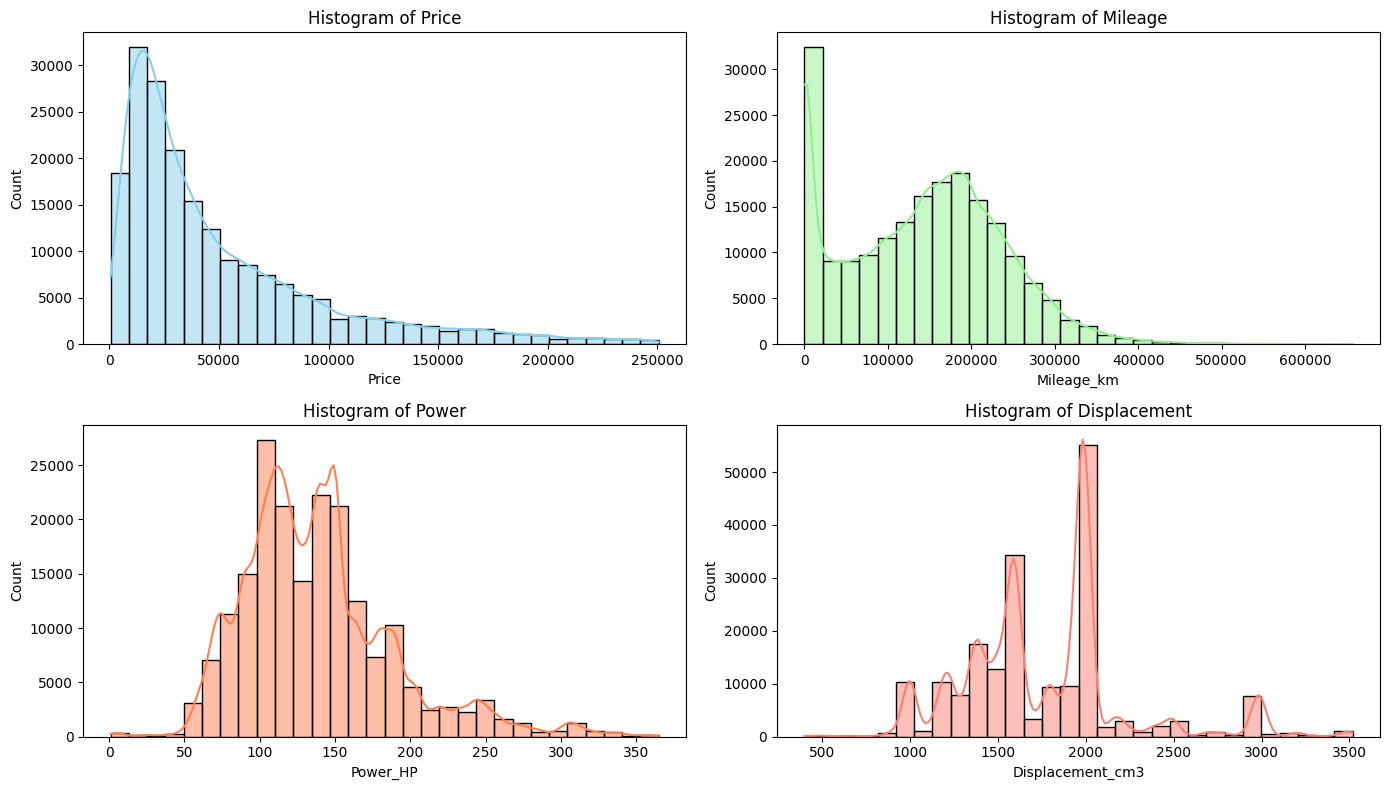

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Vẽ Histogram
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Price')

plt.subplot(2, 2, 2)
sns.histplot(df['Mileage_km'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of Mileage')

plt.subplot(2, 2, 3)
sns.histplot(df['Power_HP'], bins=30, kde=True, color='coral')
plt.title('Histogram of Power')

plt.subplot(2, 2, 4)
sns.histplot(df['Displacement_cm3'], bins=30, kde=True, color='salmon')
plt.title('Histogram of Displacement')


plt.tight_layout()
plt.show()

#### **4.2.2 Phân tích các biến định danh**

a./ Các thuộc tính có ít tập giá trị duy nhất

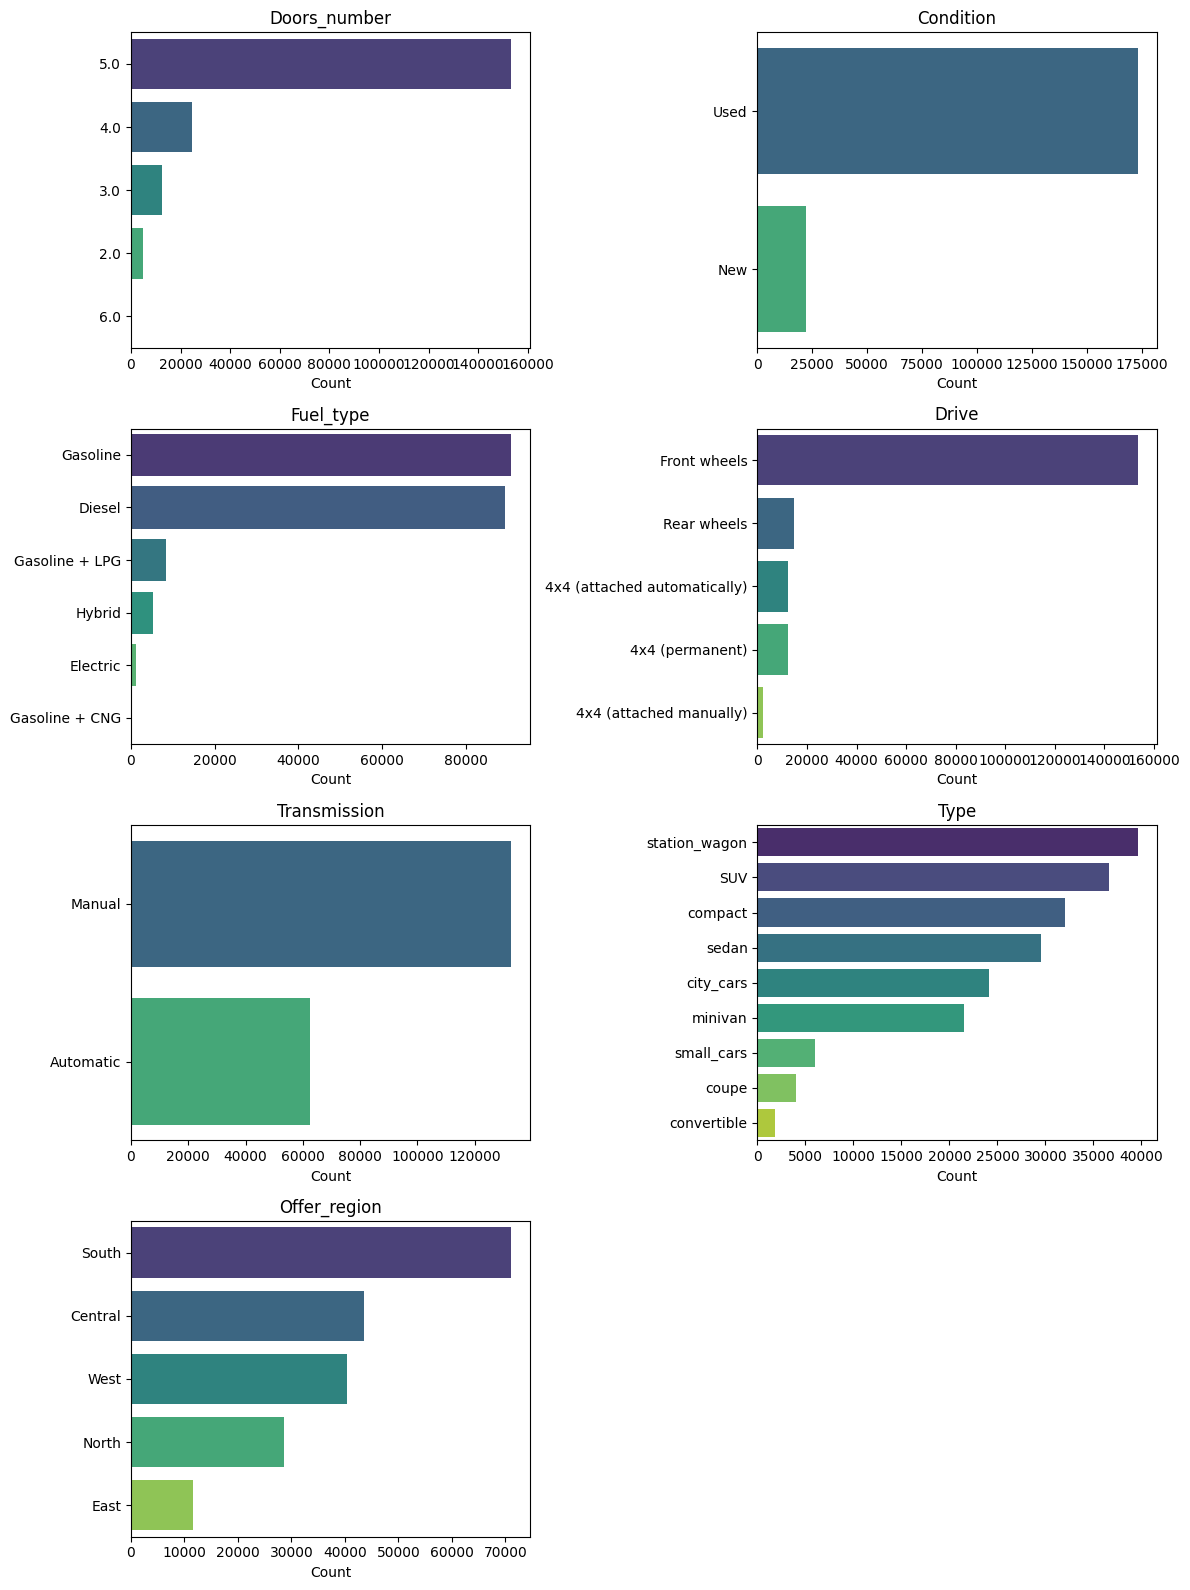

In [ ]:
category_x = ["Doors_number", "Condition", "Fuel_type", "Drive", "Transmission", "Type", "Offer_region"]
n_rows = 4
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(category_x):
            ax_i = ax[r, c]
            col = category_x[i]
            order = df[col].value_counts().index
            sns.countplot(data=df, y=col, order=order, ax=ax_i, palette='viridis')
            ax_i.set_title(f'{col}')
            ax_i.set_xlabel('Count')
            ax_i.set_ylabel(None)
        else:
            ax[r, c].axis('off')
plt.tight_layout()
plt.show()

b./ Các thuộc tính có nhiều giá trị duy nhất lớn

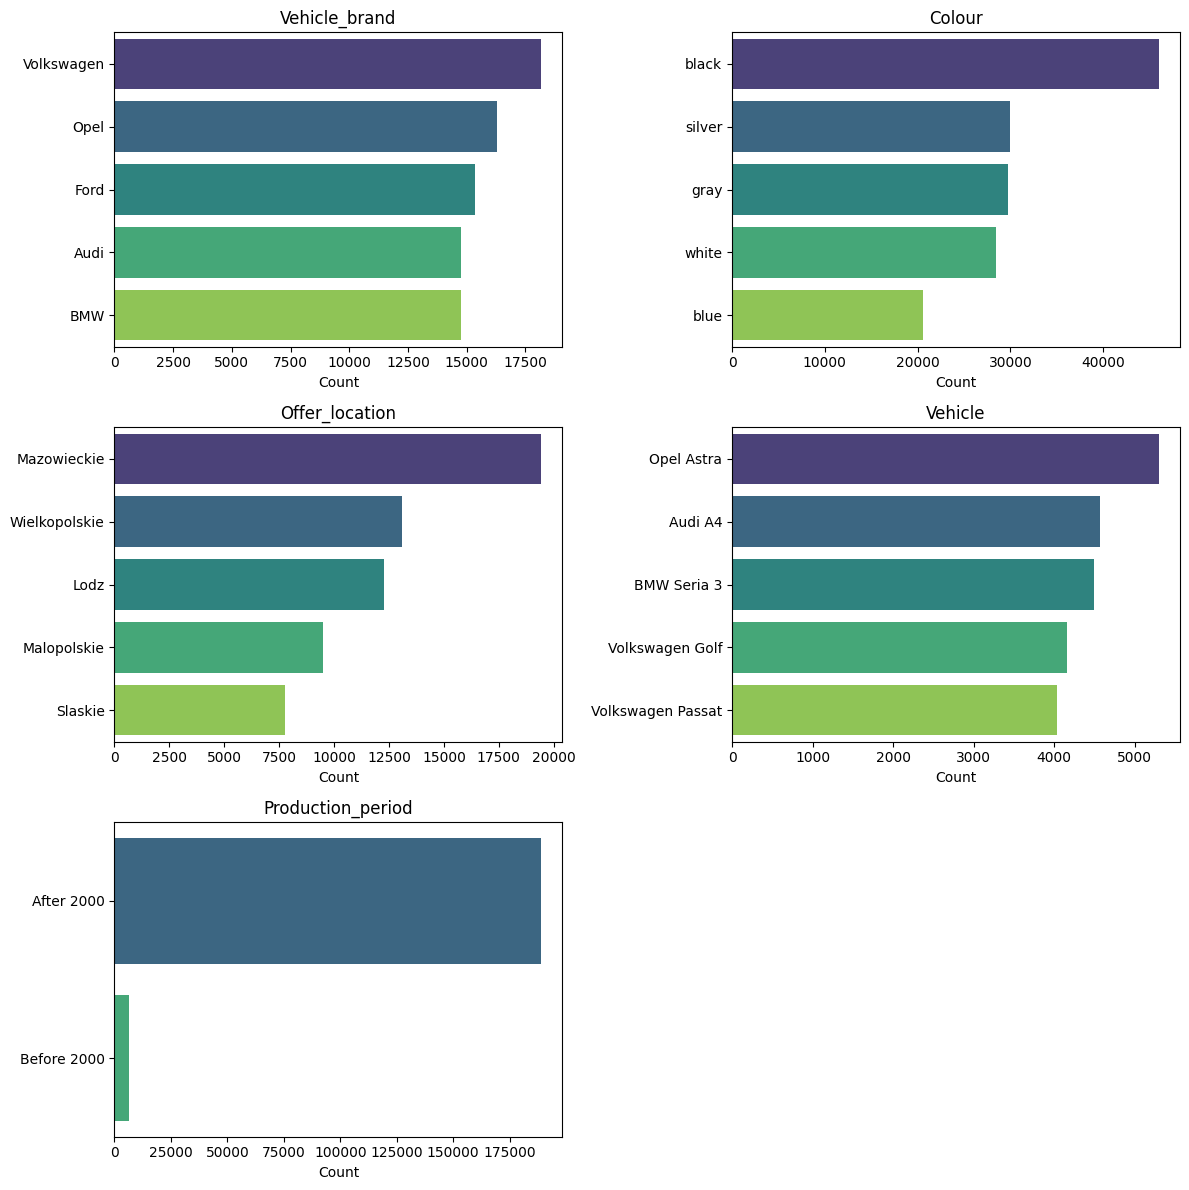

In [ ]:
high_cardinality_cols = [element for element in categorical_features if element not in category_x and element != 'Features']
n_rows = 3
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(high_cardinality_cols):
            ax_i = ax[r, c]
            col = high_cardinality_cols[i]
            order = df[col].value_counts().index[:5]  # Limit to top 5
            sns.countplot(data=df, y=col, order=order, ax=ax_i, palette='viridis')
            ax_i.set_title(f'{col}')
            ax_i.set_xlabel('Count')
            ax_i.set_ylabel(None)
        else:
            ax[r, c].axis('off')
plt.tight_layout()
plt.show()


#### **4.2.3 Phân tích các biến thời gian**

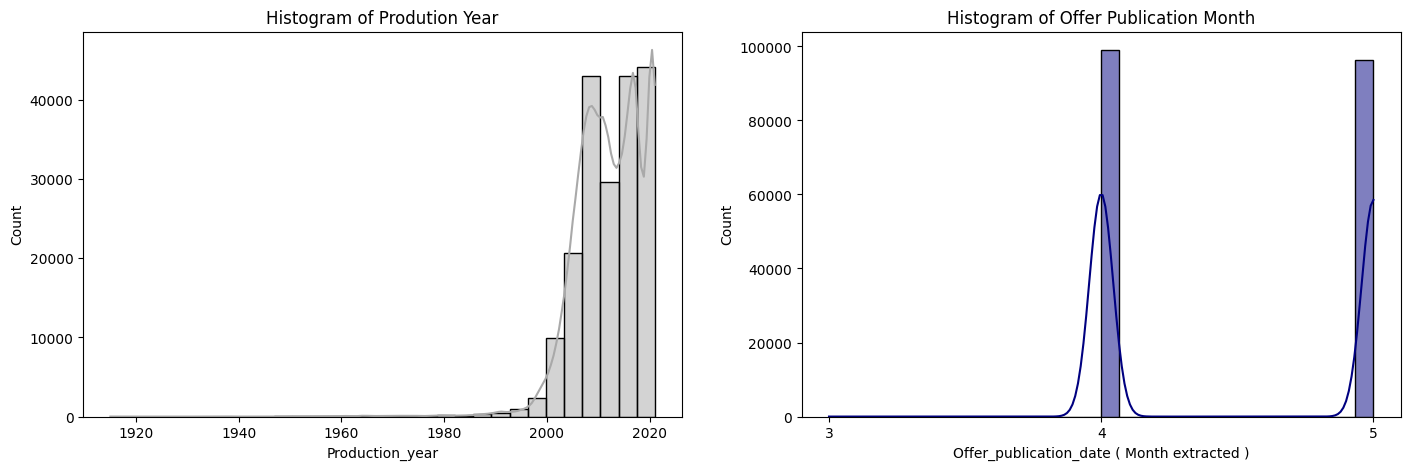

In [ ]:
plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Production_year'], bins=30, kde=True, color='darkgrey')
plt.title('Histogram of Prodution Year')

plt.subplot(1, 2, 2)
sns.histplot(df['Offer_publication_date'].dt.month, bins=30, kde=True, color='navy')
plt.xticks(range(int(min(df['Offer_publication_date'].dt.month)), int(max(df['Offer_publication_date'].dt.month)) + 1))
plt.xlabel('Offer_publication_date ( Month extracted )')
plt.title('Histogram of Offer Publication Month')


plt.show()

### **4.3 Phân tích đa biến**

#### 4.3.1 Tổng quan về tương quan

<ipython-input-244-71b09d579d9c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Tương quan của Giá')

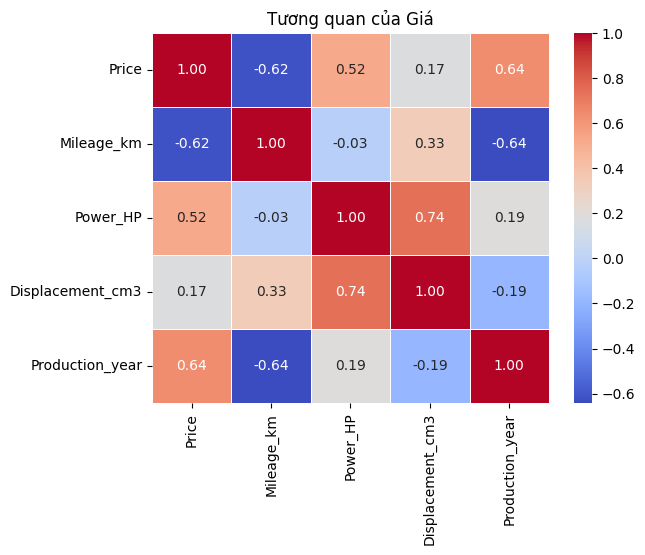

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Tương quan của Giá')

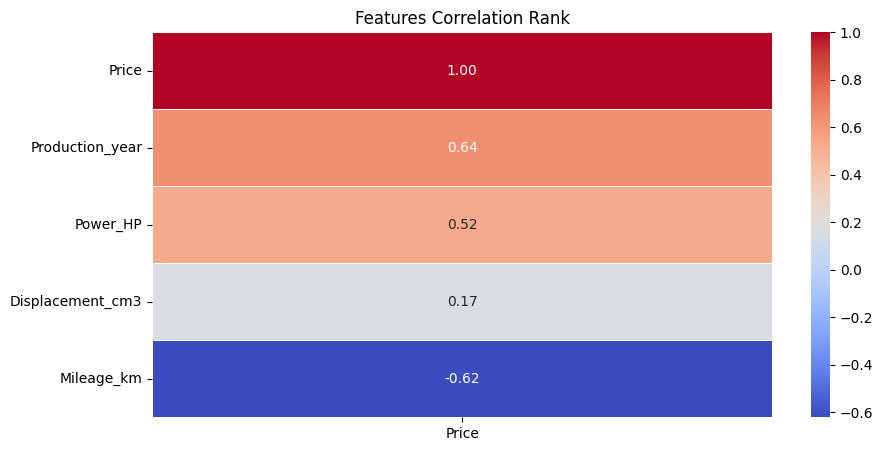

In [ ]:
plt.figure(figsize=(10, 5))
correlation_matrix = correlation_matrix.sort_values(by=['Price'],ascending=False)
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Features Correlation Rank')
plt.show()

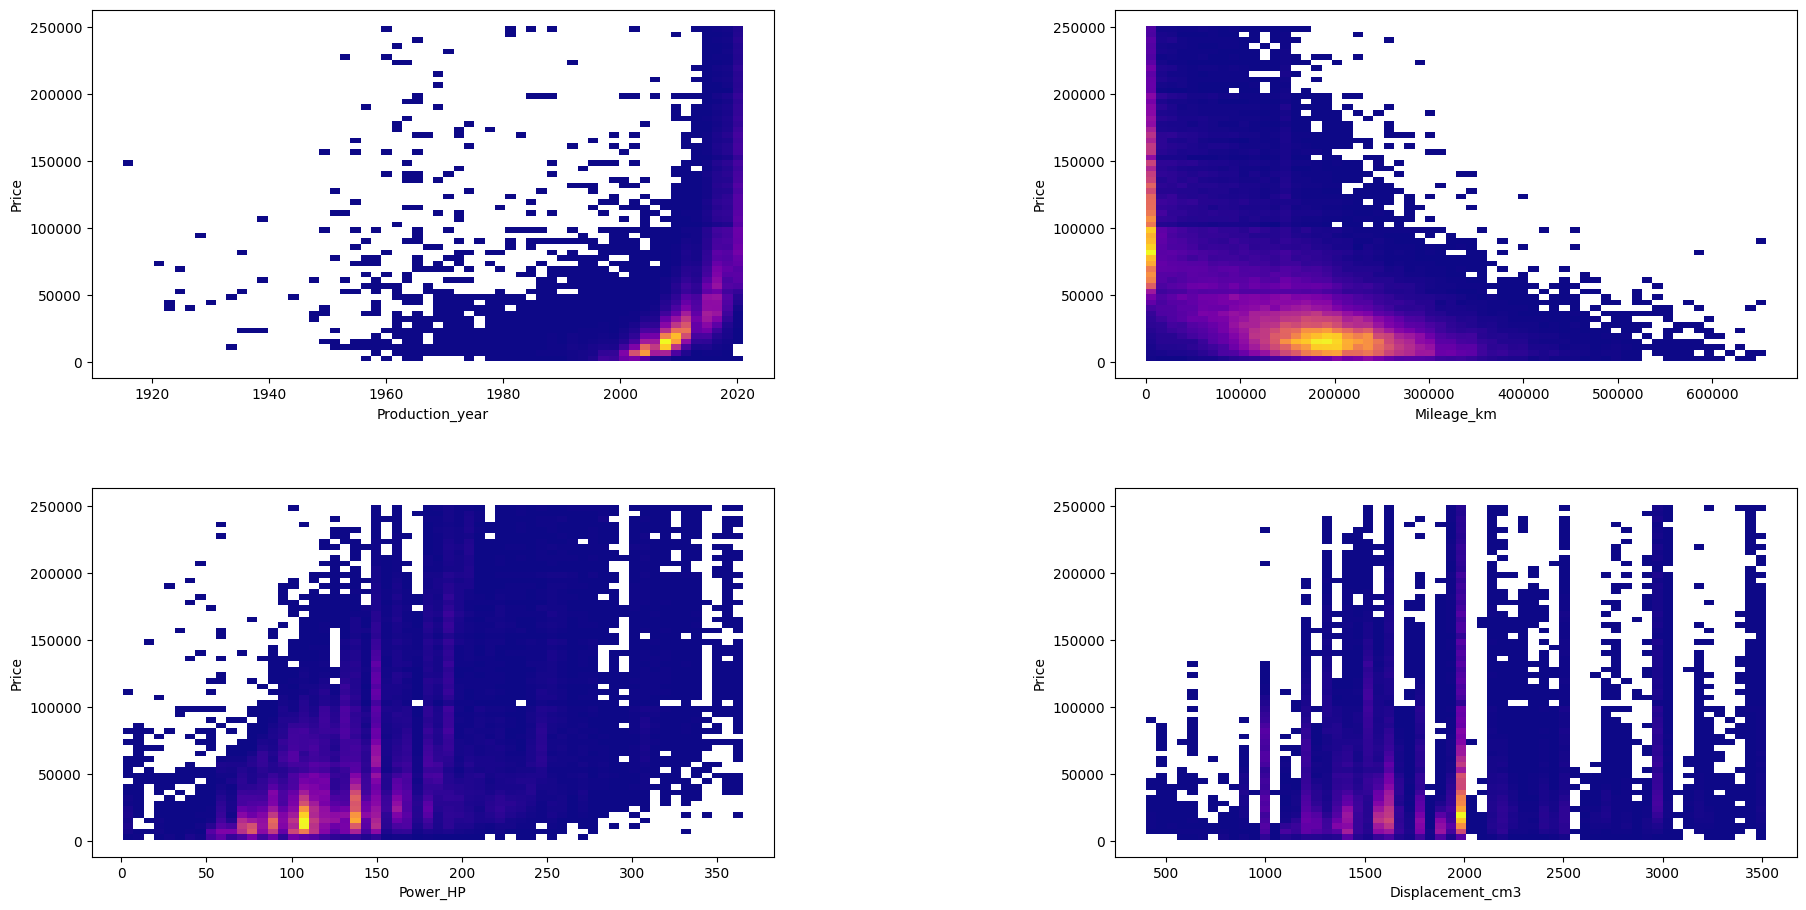

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(22, 11))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
numeric_x = ["Production_year", "Mileage_km", "Power_HP", "Displacement_cm3"]
for i, col in enumerate(numeric_x):
    sns.histplot(x=col, y="Price", data=df, cmap='plasma', ax=axs[int(i/2), i%2],bins=60)
plt.show()

#### 4.3.2 Phân tích sự tương quan giữa giá xe trung bình và và năm sản xuất

In [ ]:
price_before2k_mean = df[df['Production_period'] == 'Before 2000'].groupby('Production_year')['Price'].mean()
price_after2k_mean = df[df['Production_period'] == 'After 2000'].groupby('Production_year')['Price'].mean()

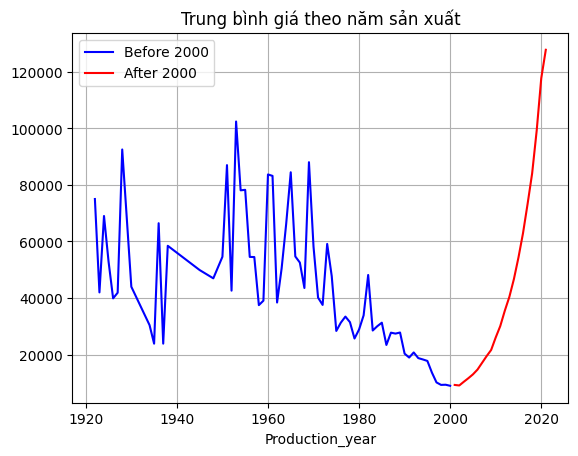

In [ ]:
import matplotlib.pyplot as plt

price_before2k_mean.plot(color='blue', label='Before 2000')

price_after2k_mean.plot(color='red', label='After 2000')

plt.grid()
plt.legend()
plt.title('Trung bình giá theo năm sản xuất')
plt.show()

##### a./ Phân tích trung bình giá trước năm 2000

In [ ]:
# Tương quan giữa năm sản xuất và trung bình giá trước 2000
correlation_price_pyear_before2k = price_before2k_mean.reset_index()['Production_year'].corr(price_before2k_mean.reset_index()['Price'], method='pearson')
print(f"Tương quan trung bình giá bán của những xe trước năm 2000: {correlation_price_pyear_before2k.round(3)}")

Tương quan trung bình giá bán của những xe trước năm 2000: -0.569


In [ ]:
# Độ lệch chuẩn giữa năm sản xuất và trung bình giá trước 2000
std_price_b2k = price_before2k_mean.std()
print("Độ lệch chuẩn giữa năm sản xuất và trung bình giá trước 2000: ", round(std_price_b2k,3))

Độ lệch chuẩn giữa năm sản xuất và trung bình giá trước 2000:  22965.82


In [ ]:
# Độ biến động của trung bình giá bán:
cv_price_before2k = (price_before2k_mean.std() / price_before2k_mean.mean()) * 100
print("Độ biến động giá với xe sản xuất trước năm 2000:",cv_price_before2k.round(2))
print(f"Khoảng giá trị tiền sản xuất trước năm 2000 với Min: {round(min(price_before2k_mean))} plotly đến Max: {round(max(price_before2k_mean))} plotly")

Độ biến động giá với xe sản xuất trước năm 2000: 52.3
Khoảng giá trị tiền sản xuất trước năm 2000 với Min: 9011 plotly đến Max: 102388 plotly


##### b./ Phân tích trung bình giá sau năm 2000

In [ ]:
# Tương quan giữa năm sản xuất và trung bình giá sau 2000
correlation_price_pyear_after2k = price_after2k_mean.reset_index()['Production_year'].corr(price_after2k_mean.reset_index()['Price'], method='pearson')
print(f"Tương quan trung bình giá bán của những xe trước năm 2000: {correlation_price_pyear_after2k.round(3)}")

Tương quan trung bình giá bán của những xe trước năm 2000: 0.93


In [ ]:
std_price_a2k = price_after2k_mean.std()
print("Độ lệch chuẩn trung bình giá sau 2000: ", round(std_price_a2k,3))

Độ lệch chuẩn trung bình giá sau 2000:  36905.472


In [ ]:
# Độ biến động của trung bình giá bán:
cv_price_after2k = (price_after2k_mean.std() / price_after2k_mean.mean()) * 100
print("Độ biến động giá với xe sản xuất trước năm 2000: ", cv_price_after2k.round(2))
print(f"Khoảng giá trị tiền sản xuất trước năm 2000 với Min: {round(min(price_after2k_mean))} plotly đến Max: {round(max(price_after2k_mean))} plotly")

Độ biến động giá với xe sản xuất trước năm 2000:  83.82
Khoảng giá trị tiền sản xuất trước năm 2000 với Min: 9121 plotly đến Max: 127726 plotly


In [ ]:
round(pd.DataFrame({
    "Tương quan": [correlation_price_pyear_before2k, correlation_price_pyear_after2k],
    "Độ lệch chuẩn": [std_price_b2k, std_price_a2k],
    "Độ biến động": [cv_price_before2k, cv_price_after2k]
}, index = ['Trước 2000', 'Sau 2000']),3)

Tương quan  Độ lệch chuẩn  Độ biến động
Trước 2000      -0.569      22965.820        52.300
Sau 2000         0.930      36905.472        83.823

#### 4.3.3 Phân tích xu hướng định giá xe trung bình theo mileage_km và năm sản xuất


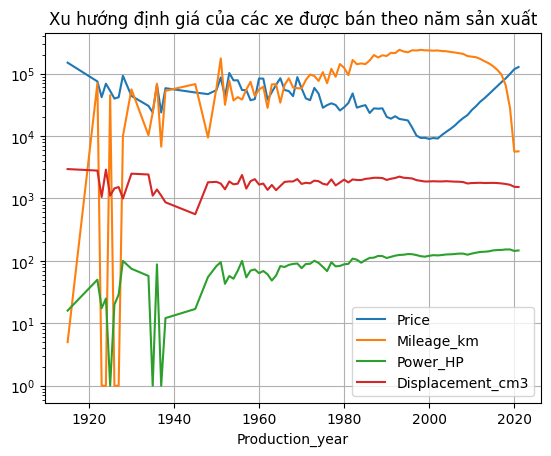

In [ ]:
overall = df.groupby('Production_year')[['Price','Mileage_km','Power_HP','Displacement_cm3']].mean().sort_index()
overall.plot()
plt.grid()
plt.xlabel('Production_year')
plt.title('Xu hướng định giá của các xe được bán theo năm sản xuất')
plt.yscale('log')
plt.show()

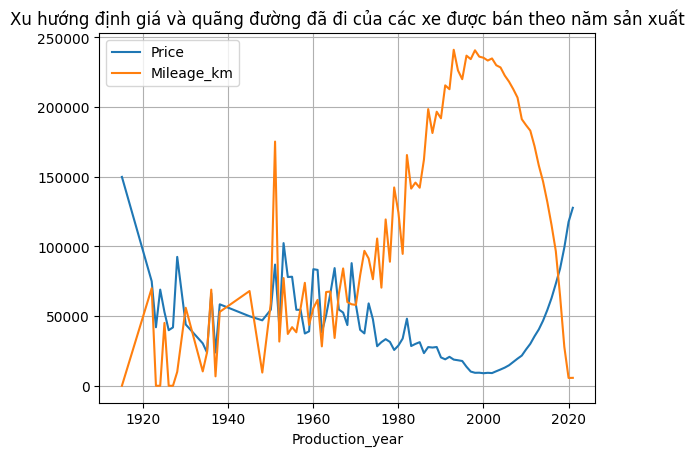

Price  Mileage_km
mean   45.14399   112.33829
std    28.89206    78.83294
min     9.01132     0.00100
25%    23.90000    54.97036
50%    39.49000    90.19550
75%    58.25283   188.10386
max   149.90000   241.12158

In [ ]:
price_mileage_mean_production_year = df.groupby('Production_year')[['Price','Mileage_km']].mean().sort_index()
price_mileage_mean_production_year.plot()
plt.grid()
plt.xlabel('Production_year')
plt.title('Xu hướng định giá và quãng đường đã đi của các xe được bán theo năm sản xuất')
plt.show()
(price_mileage_mean_production_year.describe().round(2) / 1000).drop('count')

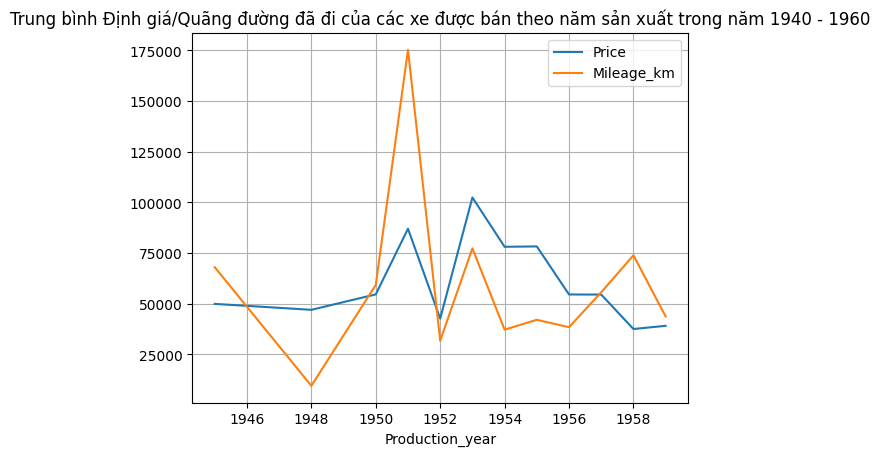

In [ ]:
price_mileage_mean_production_year[(price_mileage_mean_production_year.index > 1940) &  (price_mileage_mean_production_year.index < 1960)].sort_values(by='Production_year',ascending=False).plot()
plt.grid()
plt.title('Trung bình Định giá/Quãng đường đã đi của các xe được bán theo năm sản xuất trong năm 1940 - 1960')
plt.show()

In [ ]:
corr_4060 = df[(df['Production_year'] > 1940) & (df['Production_year'] < 1960)][['Price','Mileage_km']].corr().iloc[1,0]
print('Tương quan giá / quãng đường ( trung bình ) đi được từ 1940-1960:', corr_4060)

Tương quan giá / quãng đường ( trung bình ) đi được từ 1940-1960: 0.21107280371033416


#### 4.3.3 Phân tích sự tương quan giữa giá xe trung bình, loại xe và loại nhiên liệu mà xe sử dụng


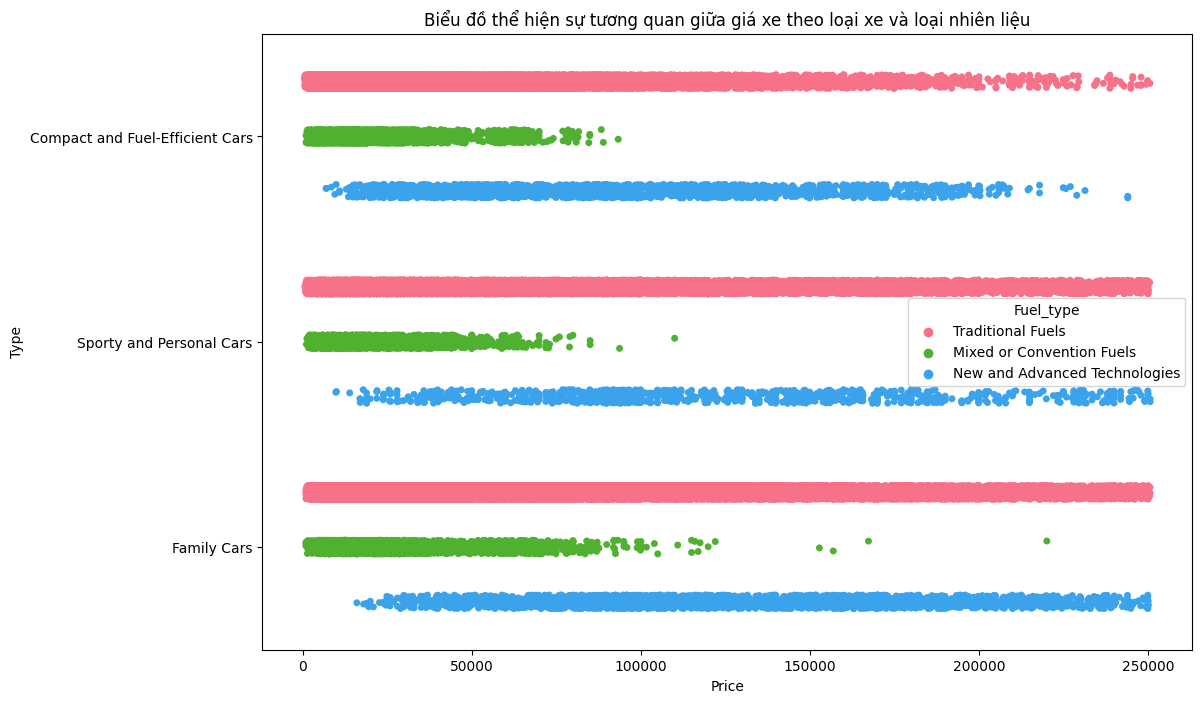

In [ ]:
df['Type'] = df['Type'].replace({
  'station_wagon' : 'Family Cars',
  'SUV' : 'Family Cars',
  'minivan' : 'Family Cars',
  'compact' : 'Compact and Fuel-Efficient Cars',
  'city_cars' : 'Compact and Fuel-Efficient Cars',
  'small_cars' : 'Compact and Fuel-Efficient Cars',
  'sedan' : 'Sporty and Personal Cars',
  'coupe' : 'Sporty and Personal Cars',
  'convertible' : 'Sporty and Personal Cars'
})

df['Fuel_type'] = df['Fuel_type'].replace({
    'Gasoline' : 'Traditional Fuels',
    'Diesel' : 'Traditional Fuels',
    'Gasoline + LPG' : 'Mixed or Convention Fuels',
    'Gasoline + CNG' : 'Mixed or Convention Fuels',
    'Hybrid' : 'New and Advanced Technologies',
    'Electric' : 'New and Advanced Technologies'
})

# Vẽ stripplot
plt.figure(figsize=(12, 8))
sns.stripplot(x='Price', y='Type', hue='Fuel_type', data=df, dodge=True, palette='husl', jitter=True)
plt.title('Biểu đồ thể hiện sự tương quan giữa giá xe theo loại xe và loại nhiên liệu')
plt.show()

#### 4.3.5 Phân tích sự về xu hướng chuyển dịch trong loại hộp số của xe, xem xét sự khác biệt của  giá xe theo loại hộp số của top 10 hãng xe được quảng cáo nhiều nhất.

In [ ]:
# mileage_before2k_mean = df[df['Production_period'] == 'Before 2000'].groupby('Production_year')['Displacement_cm3'].mean()
# mileage_after2k_mean = df[df['Production_period'] == 'After 2000'].groupby('Production_year')['Displacement_cm3'].mean()

<ipython-input-261-b2bc9e3e3e02>:11: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

<ipython-input-261-b2bc9e3e3e02>:11: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



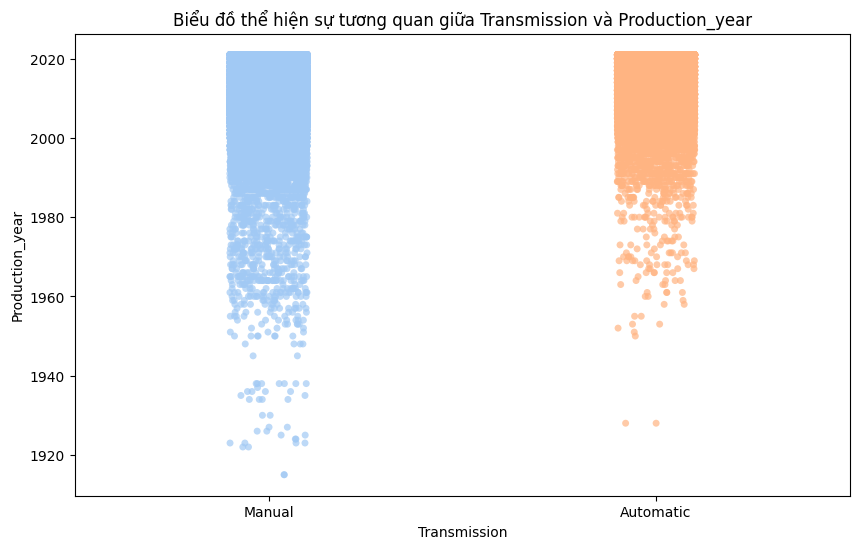

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bảng màu pastel
pastel_palette = sns.color_palette("pastel")

# Vẽ strip plot với màu pastel
plt.figure(figsize=(10, 6))
sns.stripplot(x='Transmission', y='Production_year', data=df, jitter=True, alpha=0.7, palette=pastel_palette)
plt.title('Biểu đồ thể hiện sự tương quan giữa Transmission và Production_year')
plt.xlabel('Transmission')
plt.ylabel('Production_year')
plt.show()

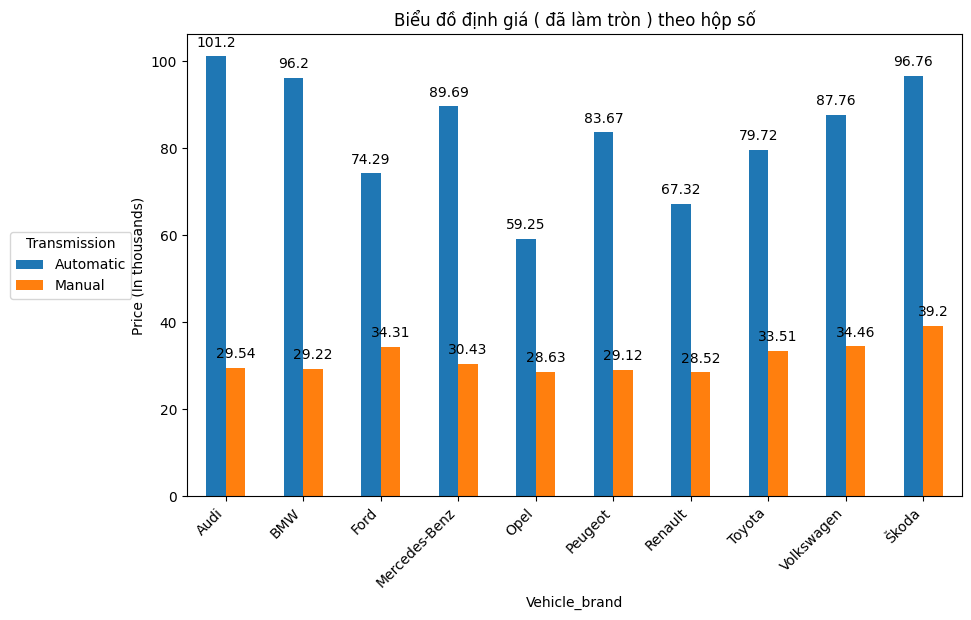

In [ ]:
mean_prices = (df[df['Vehicle_brand'].isin(ranked_brand.keys())].groupby(['Vehicle_brand', 'Transmission'])['Price'].mean() / 1000).round(2).unstack()


ax = mean_prices.plot(kind='bar', figsize=(10, 6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_ylabel('Price (In thousands)')
ax.legend(title='Transmission',loc='center', bbox_to_anchor=(-0.15, 0.5))
ax.set_title('Biểu đồ định giá ( đã làm tròn ) theo hộp số')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 4.3.6 Phân tích yếu tố ảnh hưởng đến sự quảng bá của top 5 hãng xe ở mốc thời gian trước và sau năm 2000

In [ ]:
vehicle_before2k = df[df['Production_period'] == 'Before 2000']
vehicle_after2k = df[df['Production_period'] == 'After 2000']

In [ ]:
most_5_brand_before2k =vehicle_before2k['Vehicle_brand'].value_counts()[:5].sort_values(ascending=True)
most_5_brand_after2k = vehicle_after2k['Vehicle_brand'].value_counts()[:5].sort_values(ascending=True)

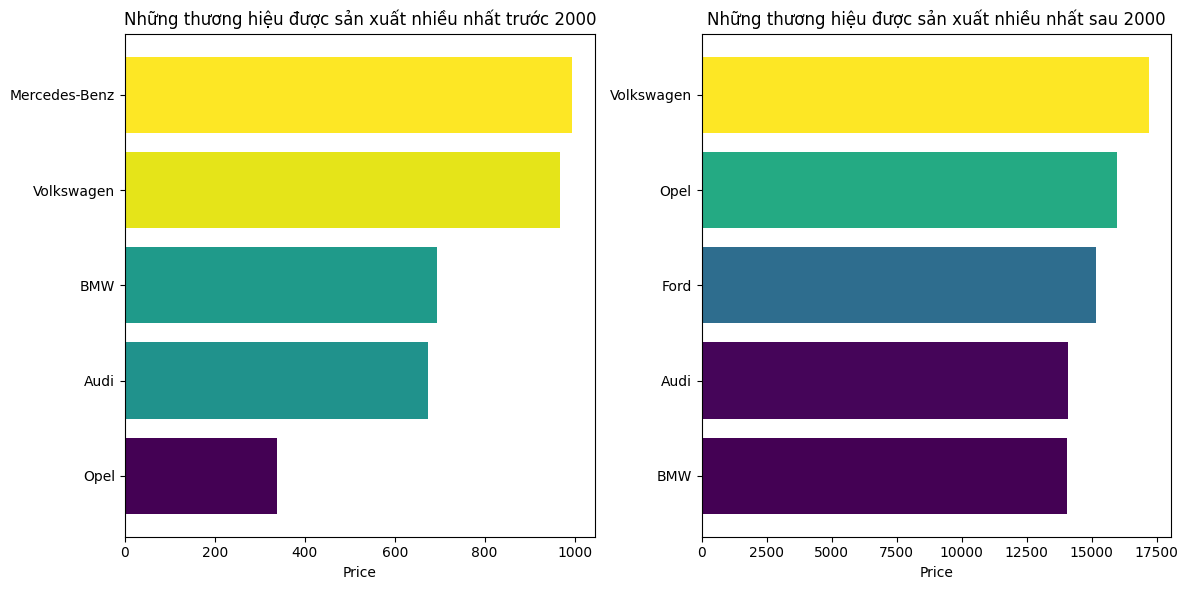

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

colormap = plt.cm.viridis

norm = mcolors.Normalize(vmin=most_5_brand_before2k.min(), vmax=most_5_brand_before2k.max())
colors_before2k = colormap(norm(most_5_brand_before2k.values))

bars_before2k = axs[0].barh(most_5_brand_before2k.index, most_5_brand_before2k, color=colors_before2k)
axs[0].set_title('Những thương hiệu được sản xuất nhiều nhất trước 2000')
axs[0].set_xlabel('Price')


norm_after2k = mcolors.Normalize(vmin=most_5_brand_after2k.min(), vmax=most_5_brand_after2k.max())
colors_after2k = colormap(norm_after2k(most_5_brand_after2k.values))

bars_after2k = axs[1].barh(most_5_brand_after2k.index, most_5_brand_after2k, color=colors_after2k)
axs[1].set_title('Những thương hiệu được sản xuất nhiều nhất sau 2000')
axs[1].set_xlabel('Price')


plt.tight_layout()
plt.show()


In [ ]:
vehicle_before2k = df[df['Production_period'] == 'Before 2000']
vehicle_after2k = df[df['Production_period'] == 'After 2000']

In [ ]:
most_5_brand_before2k =vehicle_before2k['Vehicle_brand'].value_counts()[:5].sort_values(ascending=True)
most_5_brand_after2k = vehicle_before2k['Vehicle_brand'].value_counts()[:5].sort_values(ascending=True)

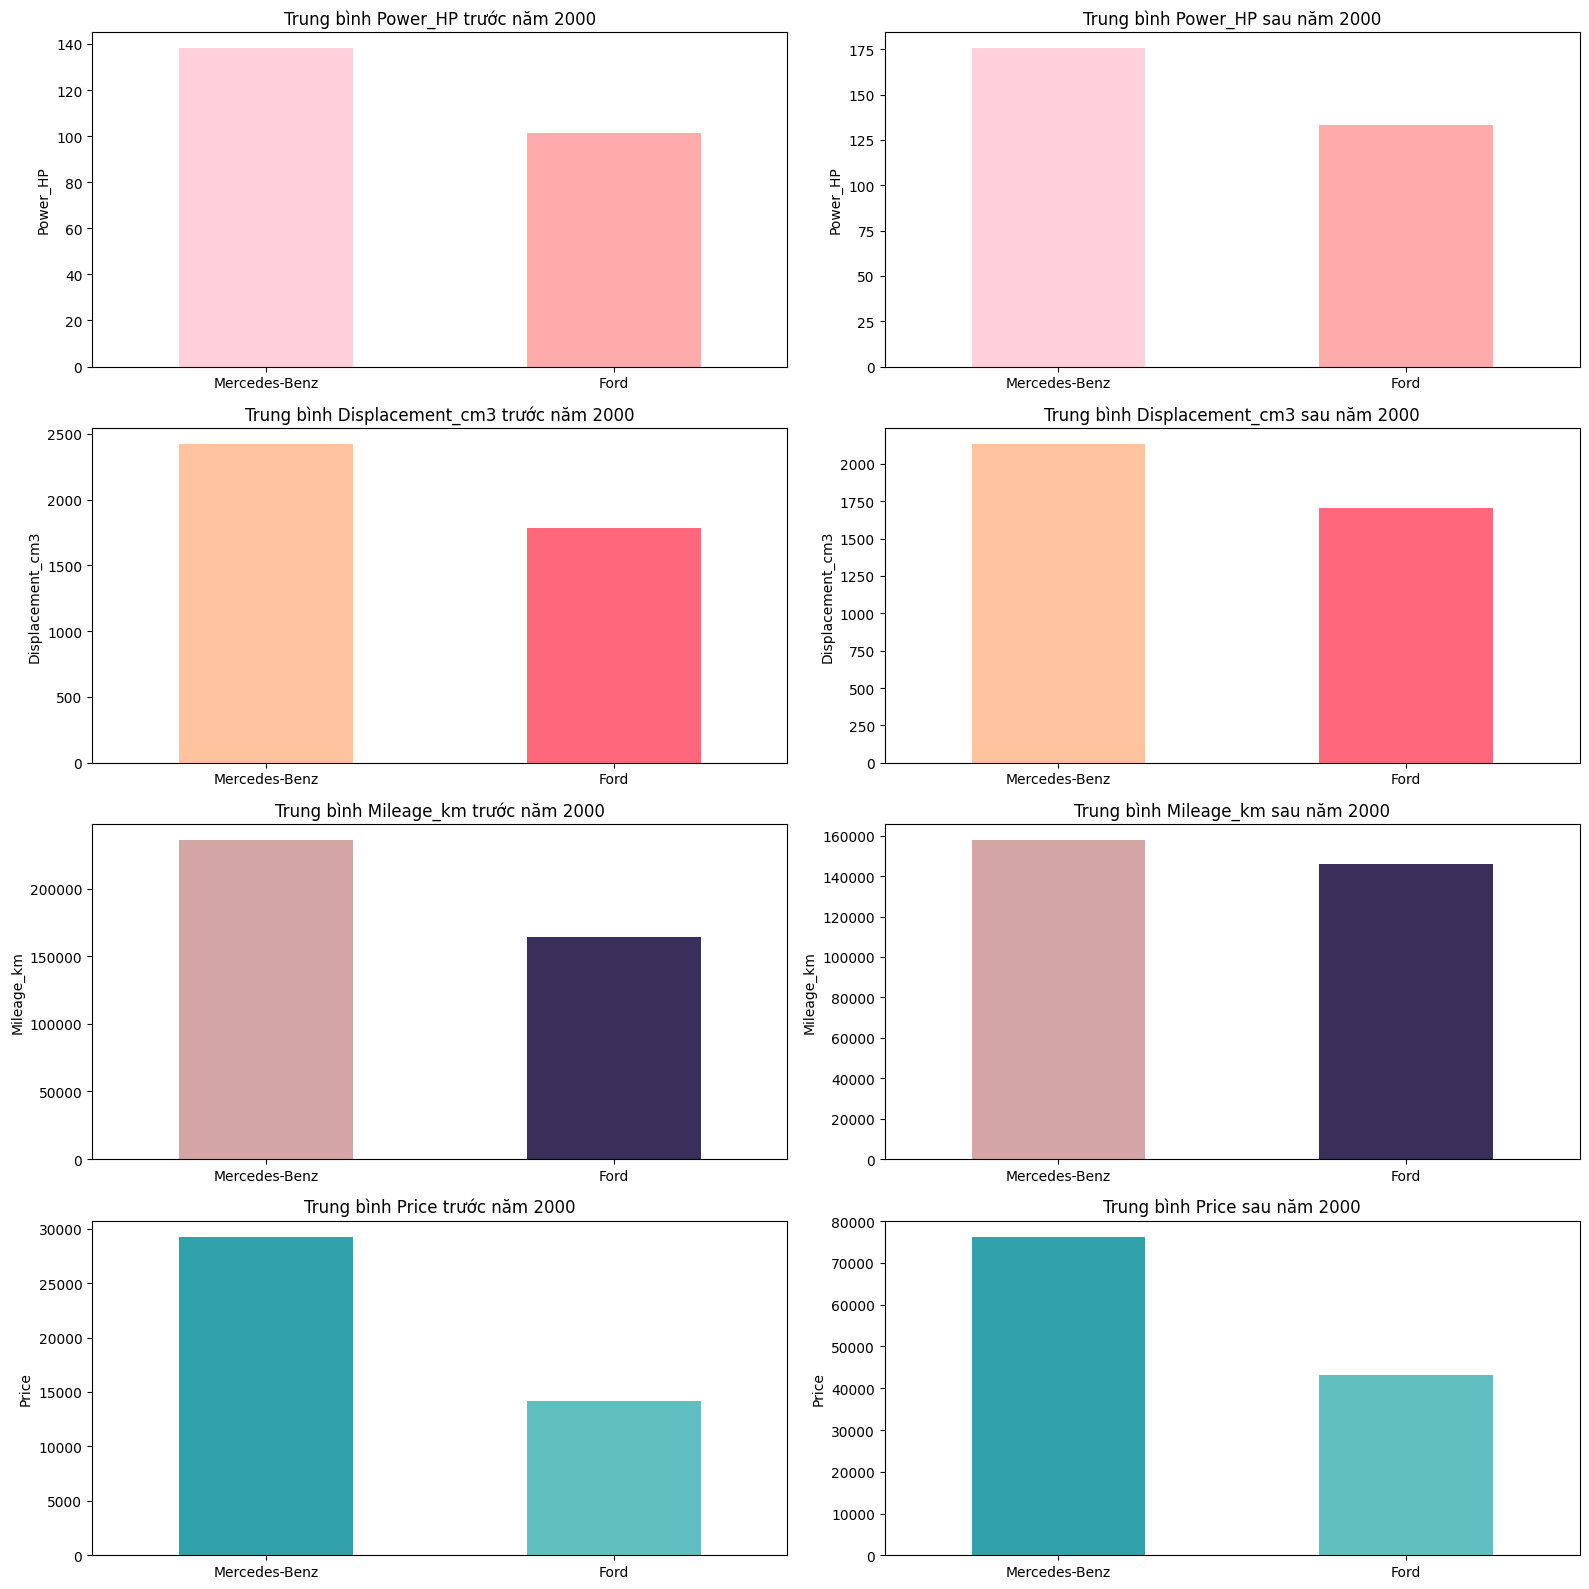

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lọc dữ liệu cho Mercedes-Benz và Ford trước năm 2000
mercedes_benz_before_2k = vehicle_before2k[vehicle_before2k['Vehicle_brand'] == 'Mercedes-Benz']
ford_before_2k = vehicle_before2k[vehicle_before2k['Vehicle_brand'] == 'Ford']

# Lọc dữ liệu cho Mercedes-Benz và Ford sau năm 2000
mercedes_benz_after_2k = vehicle_after2k[vehicle_after2k['Vehicle_brand'] == 'Mercedes-Benz']
ford_after_2k = vehicle_after2k[vehicle_after2k['Vehicle_brand'] == 'Ford']

# Tính trung bình Power_HP và Displacement_cm3 cho Mercedes-Benz và Ford trước năm 2000
avg_power_before_2k = pd.Series({
    'Mercedes-Benz': mercedes_benz_before_2k['Power_HP'].mean(),
    'Ford': ford_before_2k['Power_HP'].mean()
})

avg_displacement_before_2k = pd.Series({
    'Mercedes-Benz': mercedes_benz_before_2k['Displacement_cm3'].mean(),
    'Ford': ford_before_2k['Displacement_cm3'].mean()
})

# Tính trung bình Power_HP và Displacement_cm3 cho Mercedes-Benz và Ford sau năm 2000
avg_power_after_2k = pd.Series({
    'Mercedes-Benz': mercedes_benz_after_2k['Power_HP'].mean(),
    'Ford': ford_after_2k['Power_HP'].mean()
})

avg_displacement_after_2k = pd.Series({
    'Mercedes-Benz': mercedes_benz_after_2k['Displacement_cm3'].mean(),
    'Ford': ford_after_2k['Displacement_cm3'].mean()
})

# Tính trung bình Mileage_km cho Mercedes-Benz và Ford trước năm 2000
avg_mileage_before_2k = pd.Series({
    'Mercedes-Benz': mercedes_benz_before_2k['Mileage_km'].mean(),
    'Ford': ford_before_2k['Mileage_km'].mean()
})

# Tính trung bình Mileage_km cho Mercedes-Benz và Ford sau năm 2000
avg_mileage_after_2k = pd.Series({
    'Mercedes-Benz': mercedes_benz_after_2k['Mileage_km'].mean(),
    'Ford': ford_after_2k['Mileage_km'].mean()
})

# Tính trung bình Price cho Mercedes-Benz và Ford trước năm 2000
avg_price_before_2k = pd.Series({
    'Mercedes-Benz': mercedes_benz_before_2k['Price'].mean(),
    'Ford': ford_before_2k['Price'].mean()
})

# Tính trung bình Price cho Mercedes-Benz và Ford sau năm 2000
avg_price_after_2k = pd.Series({
    'Mercedes-Benz': mercedes_benz_after_2k['Price'].mean(),
    'Ford': ford_after_2k['Price'].mean()
})


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
pastel_colors = ['#FFD1DC', '#FFABAB', '#FFC3A0', '#FF677D', '#D4A5A5', '#392F5A', '#31A2AC', '#61C0BF']

# Vẽ biểu đồ Power_HP
avg_power_before_2k.plot(kind='bar', color=pastel_colors[:2], ax=axes[0, 0])
axes[0, 0].set_title('Trung bình Power_HP trước năm 2000')
axes[0, 0].set_ylabel('Power_HP')
axes[0, 0].tick_params(axis='x', rotation=0)

avg_power_after_2k.plot(kind='bar', color=pastel_colors[:2], ax=axes[0, 1])
axes[0, 1].set_title('Trung bình Power_HP sau năm 2000')
axes[0, 1].set_ylabel('Power_HP')
axes[0, 1].tick_params(axis='x', rotation=0)

# Vẽ biểu đồ Displacement_cm3
avg_displacement_before_2k.plot(kind='bar', color=pastel_colors[2:4], ax=axes[1, 0])
axes[1, 0].set_title('Trung bình Displacement_cm3 trước năm 2000')
axes[1, 0].set_ylabel('Displacement_cm3')
axes[1, 0].tick_params(axis='x', rotation=0)

avg_displacement_after_2k.plot(kind='bar', color=pastel_colors[2:4], ax=axes[1, 1])
axes[1, 1].set_title('Trung bình Displacement_cm3 sau năm 2000')
axes[1, 1].set_ylabel('Displacement_cm3')
axes[1, 1].tick_params(axis='x', rotation=0)

# Vẽ biểu đồ Mileage_km
avg_mileage_before_2k.plot(kind='bar', color=pastel_colors[4:6], ax=axes[2, 0])
axes[2, 0].set_title('Trung bình Mileage_km trước năm 2000')
axes[2, 0].set_ylabel('Mileage_km')
axes[2, 0].tick_params(axis='x', rotation=0)

avg_mileage_after_2k.plot(kind='bar', color=pastel_colors[4:6], ax=axes[2, 1])
axes[2, 1].set_title('Trung bình Mileage_km sau năm 2000')
axes[2, 1].set_ylabel('Mileage_km')
axes[2, 1].tick_params(axis='x', rotation=0)

# Vẽ biểu đồ Price
avg_price_before_2k.plot(kind='bar', color=pastel_colors[6:], ax=axes[3, 0])
axes[3, 0].set_title('Trung bình Price trước năm 2000')
axes[3, 0].set_ylabel('Price')
axes[3, 0].tick_params(axis='x', rotation=0)

avg_price_after_2k.plot(kind='bar', color=pastel_colors[6:], ax=axes[3, 1])
axes[3, 1].set_title('Trung bình Price sau năm 2000')
axes[3, 1].set_ylabel('Price')
axes[3, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### 4.3.7  Phân tích sự thay đổi của động cơ của xe theo thời gian

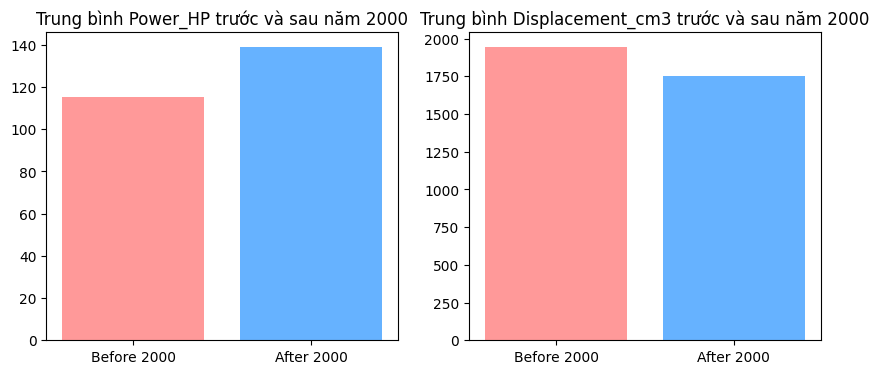

In [ ]:
# Tính trung bình công suất và dung tích động cơ cho xe trước và sau năm 2000
avg_power_before2k = vehicle_before2k['Power_HP'].mean()
avg_displacement_before2k = vehicle_before2k['Displacement_cm3'].mean()

avg_power_after2k = vehicle_after2k['Power_HP'].mean()
avg_displacement_after2k = vehicle_after2k['Displacement_cm3'].mean()

# Tạo DataFrame mới để vẽ biểu đồ
avg_data = pd.DataFrame({
    'Production_period': ['Before 2000', 'After 2000'],
    'Average_Power_HP': [avg_power_before2k, avg_power_after2k],
    'Average_Displacement_cm3': [avg_displacement_before2k, avg_displacement_after2k]
})


pastel_colors = ['#FF9999', '#66B2FF']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Biểu đồ cho công suất trung bình
axes[0].bar(avg_data['Production_period'], avg_data['Average_Power_HP'], color=pastel_colors)
axes[0].set_title('Trung bình Power_HP trước và sau năm 2000')

# Biểu đồ cho dung tích động cơ trung bình
axes[1].bar(avg_data['Production_period'], avg_data['Average_Displacement_cm3'], color=pastel_colors)
axes[1].set_title('Trung bình Displacement_cm3 trước và sau năm 2000')
plt.show()

### **4.4 Kiểm định**

#### 4.4.1 Kiểm định theo giá cả của xe

##### Giả thuyết 1: Không có sự khác biệt giữa giá của những xe sử dụng loại nhiên liệu Gasoline và Diesel
H0: μ{Price}[Gasoline] = μ{Price}[Diesel]

H1: μ{Price}[Gasoline] # μ{Price}[Diesel]

In [ ]:
# Đếm số lượng xe theo loại nhiên liệu
fuel_type_counts = df['Fuel_type'].value_counts()
fuel_type_counts

Gasoline          90878
Diesel            89343
Gasoline + LPG     8364
Hybrid             5376
Electric           1195
Gasoline + CNG       70
Name: Fuel_type, dtype: int64

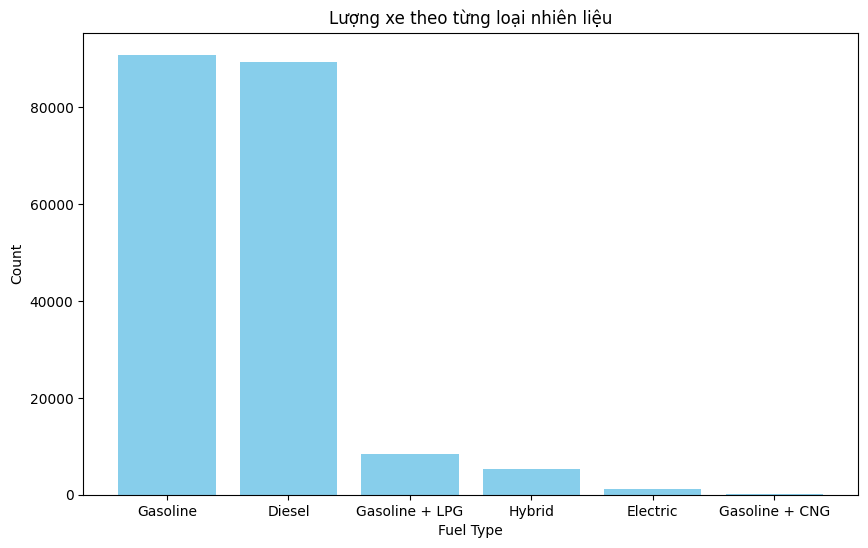

In [ ]:
# Vẽ biểu đồ thể hiện lượng xe theo từng loại nhiên liệu
color = 'skyblue'
plt.figure(figsize=(10,6))
plt.bar(fuel_type_counts.index, fuel_type_counts, color = color)
plt.title('Lượng xe theo từng loại nhiên liệu')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.show()

In [ ]:
# Biểu đồ thể hiện giá của các xe sử dụng nhiên liệu Gasiline và Diesel
import plotly.express as px
filtered_df = df[df['Fuel_type'].isin(['Gasoline', 'Diesel'])]
fig = px.box(filtered_df, x='Fuel_type', y='Price', color='Fuel_type')
fig.update_layout(title='Giá của các xe sử dụng loại nhiên liệu Gasoline và Diesel ',
                  xaxis=dict(title='Fuel_type', title_font=dict(size=20), tickfont=dict(size=14)),
                  yaxis=dict(title='Price', title_font=dict(size=20), tickfont=dict(size=14)),
                  height=500,
                  width=1200)

fig.show()

In [ ]:
price_gasoline = df[df['Fuel_type'] == 'Gasoline']['Price']
price_diesel = df[df['Fuel_type'] == 'Diesel']['Price']
# Tính toán phương sai
variance_gasoline = price_gasoline.var()
variance_diesel = price_diesel.var()

n_gasoline = len(price_gasoline)
n_diesel = len(price_diesel)

print('Phương sai của giá xe sử dụng gasoline:', variance_gasoline)
print('Phương sai của giá xe sử dụng diesel:', variance_diesel)
# Tính toán giá trị Z và p-value
z_statistic = (price_gasoline.mean() - price_diesel.mean()) / ((variance_gasoline/n_gasoline + variance_diesel/n_diesel)**0.5)
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
print('Z_statistic:', z_statistic)
print('Giá trị p:', p_value)

alpha = 0.05
confidence_level = 1 - alpha
if (p_value < alpha):
    print(f'Trị số p = {p_value:.4f} < {alpha}',
          'nên bác bỏ H0.\n=> μ[Gasoline] != μ[Diesel].\n=> Có sự khác biệt về giá giữa những xe sử dụng loại nhiên liệu Gasoline và Diesel.')
else:
    print(f'Trị số p = {p_value:.4f} >= {alpha}',
          'nên chấp nhận H0.\n=> μ[Gasoline] == μ[Diesel].\n=> Không có sự khác biệt về giá giữa những xe sử dụng loại nhiên liệu Gasoline và Diesel.')

Phương sai của giá xe sử dụng gasoline: 2134572259.0958924
Phương sai của giá xe sử dụng diesel: 2320402352.2670584
Z_statistic: 2.7331109533805678
Giá trị p: 0.006273919356706514
Trị số p = 0.0063 < 0.05 nên bác bỏ H0.
=> μ[Gasoline] != μ[Diesel].
=> Có sự khác biệt về giá giữa những xe sử dụng loại nhiên liệu Gasoline và Diesel.


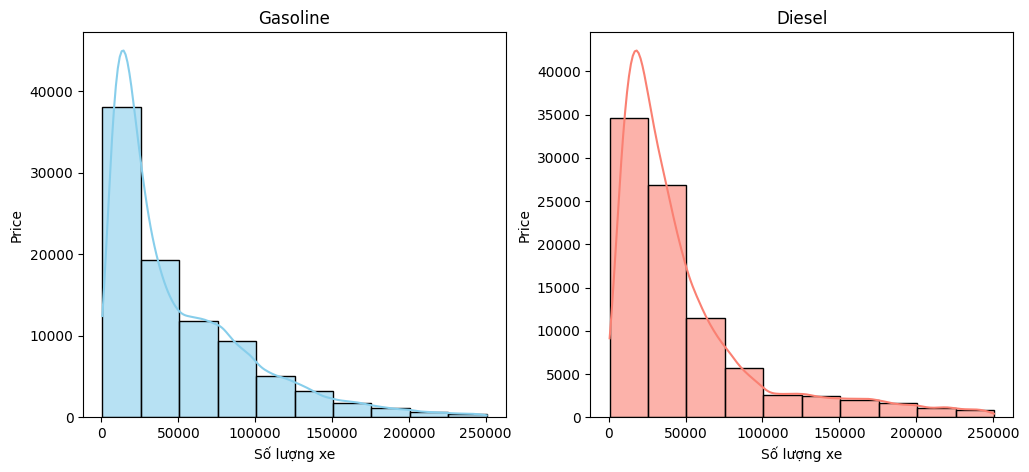

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(price_gasoline, bins=10, alpha=0.6, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Gasoline')
ax1.set_xlabel('Số lượng xe')
ax1.set_ylabel('Price')

sns.histplot(price_diesel, bins=10, alpha=0.6, kde=True, color='salmon', ax=ax2)
ax2.set_title('Diesel')
ax2.set_xlabel('Số lượng xe')
ax2.set_ylabel('Price')

plt.show()

=> Vì cả hai đều chỉ có 1 giá trị trị duy nhất trong khoảng dữ liệu xe có năm sản xuất từ 1940 đến 1960 nên không thể áp dụng ANOVA đối với hai thuộc tính này

##### Giả thuyết 2: Không có sự khác biệt về giá xe trung bình của top 5 dòng xe được quảng cáo nhiều nhất.


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

top_5_brands = df['Vehicle'].value_counts()[:5].index

# Tạo DataFrame chỉ chứa dữ liệu của top 5 brands
df_top_5 = df[df['Vehicle'].isin(top_5_brands)]


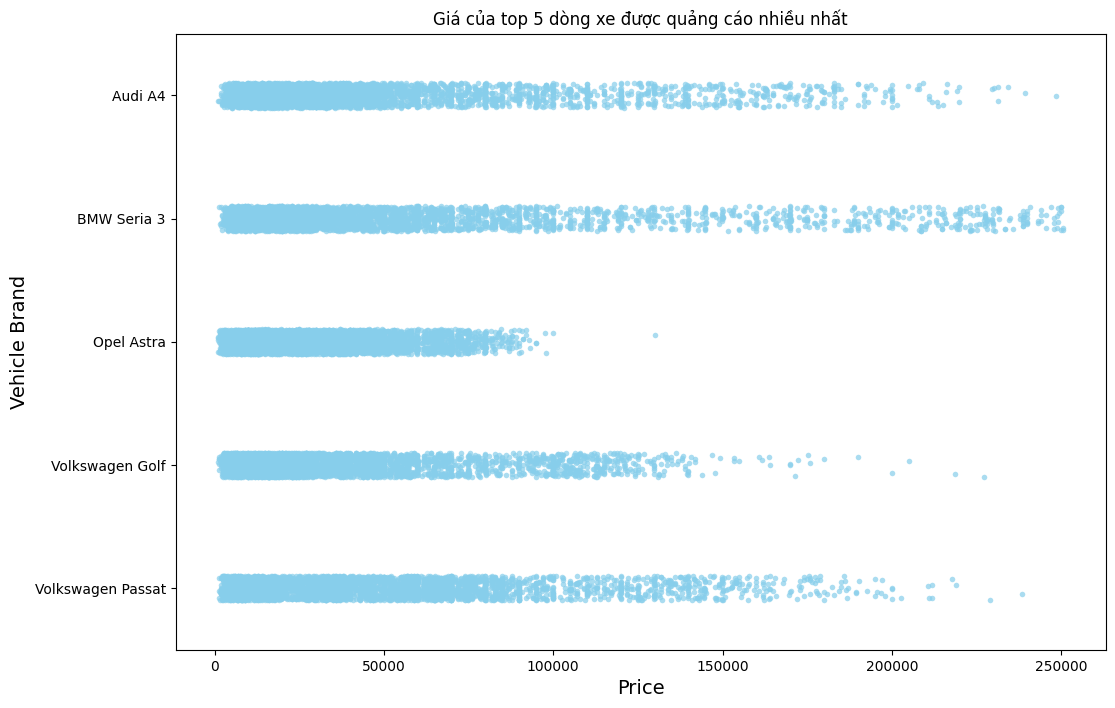

In [ ]:
# Biểu đồ stripplot thể hiện giá của top 5 dòng xe được quảng cáo nhiều nhất
top_5_brands = df['Vehicle'].value_counts()[:5].index
df_top_5 = df[df['Vehicle'].isin(top_5_brands)]

plt.figure(figsize=(12, 8))
sns.stripplot(x='Price', y='Vehicle', data=df_top_5, color='skyblue', size=4, jitter=True, alpha=0.7)

plt.title('Giá của top 5 dòng xe được quảng cáo nhiều nhất')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Vehicle Brand', fontsize=14)

plt.show()

In [ ]:
from scipy.stats import levene

top_5_brands = df['Vehicle'].value_counts()[:5].index
df_top_5 = df[df['Vehicle'].isin(top_5_brands)]

# Tạo danh sách chứa dữ liệu giá xe cho từng dòng xe
price_data = [df_top_5[df_top_5['Vehicle'] == brand]['Price'] for brand in top_5_brands]

# Tiến hành kiểm định Levene
statistic, p_value = levene(*price_data)
print(f"Levene Statistic: {statistic}")
print(f"P-Value (Levene): {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết H0.\n=> Có sự khác biệt về phương sai giữa các nhóm.")
else:
    print("Không bác bỏ giả thuyết H0.\n=> Không có sự khác biệt đáng kể về phương sai giữa các nhóm.")


Levene Statistic: 257.88862884744304
P-Value (Levene): 4.6163416573339865e-217
Có đủ bằng chứng để bác bỏ giả thuyết H0.
=> Có sự khác biệt về phương sai giữa các nhóm.


#### 4.4.2 Kiểm định theo động cơ và nhiên liệu

##### Giả thuyết 3: Xe có chỉ số Mileage_km trên 4884 thì có khả năng là xe cũ hơn so với các xe còn lại
H0: μ{Mileage_km > 4884}[Condition] = μ {Mileage_km <= 4884}[Condition]

H1: μ{Mileage_km > 4884}[Condition] # μ
 {Mileage_km <= 4884}[Condition]

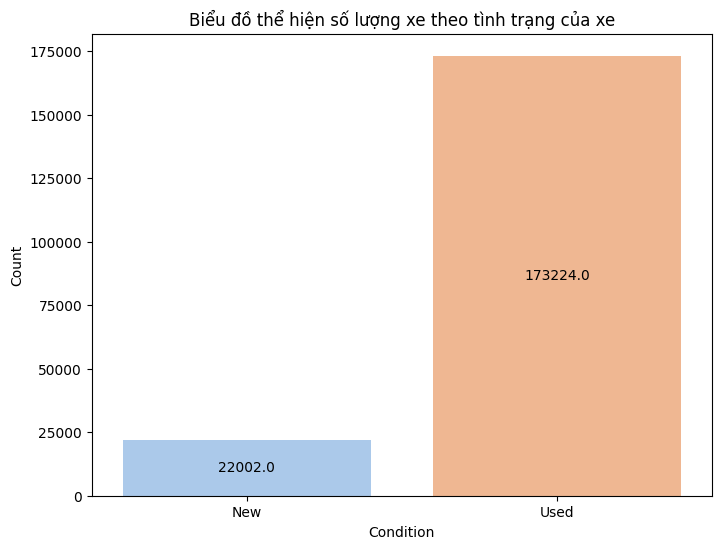

In [ ]:
# Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Condition', data=df, palette='pastel')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.title('Biểu đồ thể hiện số lượng xe theo tình trạng của xe')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [ ]:
# Lọc ra những chiếc xe có tình trạng là cũ
used_cars = df[df['Condition'] == 'New']

# Tính số km trung bình của những chiếc xe có tình trạng là cũ
average_mileage_used_cars = used_cars['Mileage_km'].mean()

# In số km trung bình
print(f"Số km trung bình của những xe cũ là: {average_mileage_used_cars} km")

Số km trung bình của những xe cũ là: 4884.177233887828 km


In [ ]:
df_condition = df.copy()

In [ ]:
condition_counts = df_condition['Condition'].value_counts()
print(condition_counts)

Used    173224
New      22002
Name: Condition, dtype: int64


In [ ]:
df_condition['Condition'] = df_condition['Condition'].replace({
    'New' : 1,
    'Used' : 0
})

In [ ]:
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

# Tạo 2 series chứa thông tin về tình trạng các xe dựa trên ngưỡng quãng đường đã đi là 4884 km
group_over = df_condition[df_condition['Mileage_km'] > 4884]['Condition']
group_under = df_condition[df_condition['Mileage_km'] <= 4884]['Condition']

# Kiểm định z test
z_statistic, p_value = ztest(group_over, group_under, alternative='two-sided')

print(f"Z-Statistic: {z_statistic}")
print(f"Giá trị p: {p_value}")

# Kiểm tra giả thuyết
alpha = 0.05
if p_value < alpha:
    print(f"Trị số p = {p_value} < {alpha}",
          'có đủ bằng chứng để bác bỏ H0\n=> Có sự chênh lệch giữa quãng đường di chuyển của 2 nhóm xe này')
else:
    print(f"Trị số p = {p_value} >= {alpha}",
          'không đủ bằng chứng để bác bỏ H0\n=> Có sự chênh lệch giữa quãng đường di chuyển của 2 nhóm xe này')


Z-Statistic: -943.9764916752024
Giá trị p: 0.0
Trị số p = 0.0 < 0.05 có đủ bằng chứng để bác bỏ H0
=> Có sự chênh lệch giữa quãng đường di chuyển của 2 nhóm xe này


##### Giả thuyết 4: Không có sự liên quan giữa loại nhiên liệu và loại hộp số của xe
H0: Loại nhiên liệu (Gasoline, Diesel) và loại hộp số của xe là Độc Lập

H1: Loại nhiên liệu (Gasoline, Diesel) và loại hộp số của xe là Phụ Thuộc lẫn nhau

In [ ]:
filtered_df = df[df['Fuel_type'].isin(['Gasoline', 'Diesel'])]
fuel_type_counts = filtered_df['Fuel_type'].value_counts()
fuel_type_counts

Gasoline    90878
Diesel      89343
Name: Fuel_type, dtype: int64

In [ ]:
df3 = filtered_df[['Fuel_type', 'Transmission']]
crosstab = pd.crosstab(df3['Fuel_type'], df3['Transmission'])
crosstab

Transmission  Automatic  Manual
Fuel_type                      
Diesel            30639   58704
Gasoline          24381   66497

In [ ]:
contingency_table = pd.crosstab(df3['Fuel_type'], df3['Transmission'])

# Kiểm định chi-squared
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Giá trị p: {p_value}')

# Kiểm tra giả thuyết
alpha = 0.05
if p_value < alpha:
    print(f'Trị số p = {p_value} < {alpha}',
     'nên bác bỏ H0\n => Loại nhiên liệu (Gasoline, Diesel) và loại hộp số của xe là Phụ Thuộc lẫn nhau')
else:
    print(f'Trị số p = {p_value} >= {alpha}',
      'nên không bác bỏ H0\n => Loại nhiên liệu (Gasoline, Diesel) và loại hộp số của xe là Độc Lập')

Chi-squared statistic: 1183.514419198795
Giá trị p: 2.333975795723498e-259
Trị số p = 2.333975795723498e-259 < 0.05 nên bác bỏ H0
 => Loại nhiên liệu (Gasoline, Diesel) và loại hộp số của xe là Phụ Thuộc lẫn nhau


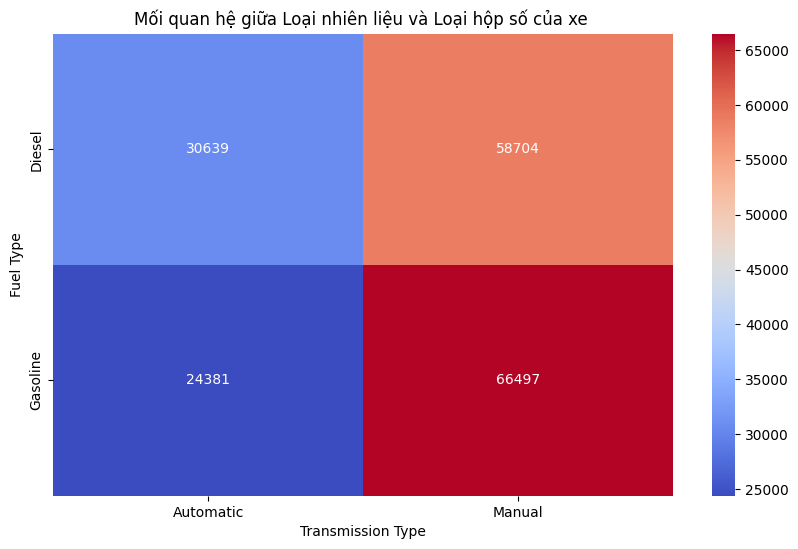

In [ ]:
# Tạo contingency table
contingency_table = pd.crosstab(df3['Fuel_type'], df3['Transmission'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt='d', cbar=True)

plt.title('Mối quan hệ giữa Loại nhiên liệu và Loại hộp số của xe ')
plt.xlabel('Transmission Type')
plt.ylabel('Fuel Type')

plt.show()


##### Giả thuyết 5: Không có sự liên quan giữa kiểu dáng của xe và loại nhiên liệu mà xe sử dụng.
H0: Kiểu dáng của xe và loại nhiên liệu mà xe sử dụng là Độc Lập

H1: Kiểu dáng của xe và loại nhiên liệu mà xe sử dụng là Phụ Thuộc lẫn nhau.

In [ ]:
df_type = df.copy()

In [ ]:
df_type['Type'] = df_type['Type'].replace({
  'station_wagon' : 'Family Cars',
  'SUV' : 'Family Cars',
  'minivan' : 'Family Cars',
  'compact' : 'Compact and Fuel-Efficient Cars',
  'city_cars' : 'Compact and Fuel-Efficient Cars',
  'small_cars' : 'Compact and Fuel-Efficient Cars',
  'sedan' : 'Sporty and Personal Cars',
  'coupe' : 'Sporty and Personal Cars',
  'convertible' : 'Sporty and Personal Cars'
})

In [ ]:
df_fuel = df.copy()

In [ ]:
df_fuel['Fuel_type'] = df_fuel['Fuel_type'].replace({
    'Gasoline' : 'Traditional Fuels',
    'Diesel' : 'Traditional Fuels',
    'Gasoline + LPG' : 'Mixed or Convention Fuels',
    'Gasoline + CNG' : 'Mixed or Convention Fuels',
    'Hybrid' : 'New and Advanced Technologies',
    'Electric' : 'New and Advanced Technologies'
})

In [ ]:
crosstab_table = pd.crosstab(df_type['Type'], df_fuel['Fuel_type'])
crosstab_table

Fuel_type                        Mixed or Convention Fuels  \
Type                                                         
Compact and Fuel-Efficient Cars                       2987   
Family Cars                                           3400   
Sporty and Personal Cars                              2047   

Fuel_type                        New and Advanced Technologies  \
Type                                                             
Compact and Fuel-Efficient Cars                           2500   
Family Cars                                               3032   
Sporty and Personal Cars                                  1039   

Fuel_type                        Traditional Fuels  
Type                                                
Compact and Fuel-Efficient Cars              56569  
Family Cars                                  91296  
Sporty and Personal Cars                     32356

In [ ]:
contingency_table = pd.crosstab(df_type['Type'], df_fuel['Fuel_type'])

# Kiểm định chi bình phương
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Giá trị p: {p_value}')

alpha = 0.05
if p_value < alpha:
  print(f'Trị số p = {p_value} < {alpha}',
     'nên bác bỏ H0\n => Kiểu dáng của xe và loại nhiên liệu mà xe sử dụng là Phụ Thuộc lẫn nhau')
else:
  print(f'Trị số p = {p_value} >= {alpha}',
    'nên không bác bỏ H0\n => Kiểu dáng của xe và loại nhiên liệu mà xe sử dụng là Độc Lập')

Chi-squared statistic: 515.6681805272433
Giá trị p: 2.735891230490413e-110
Trị số p = 2.735891230490413e-110 < 0.05 nên bác bỏ H0
 => Kiểu dáng của xe và loại nhiên liệu mà xe sử dụng là Phụ Thuộc lẫn nhau


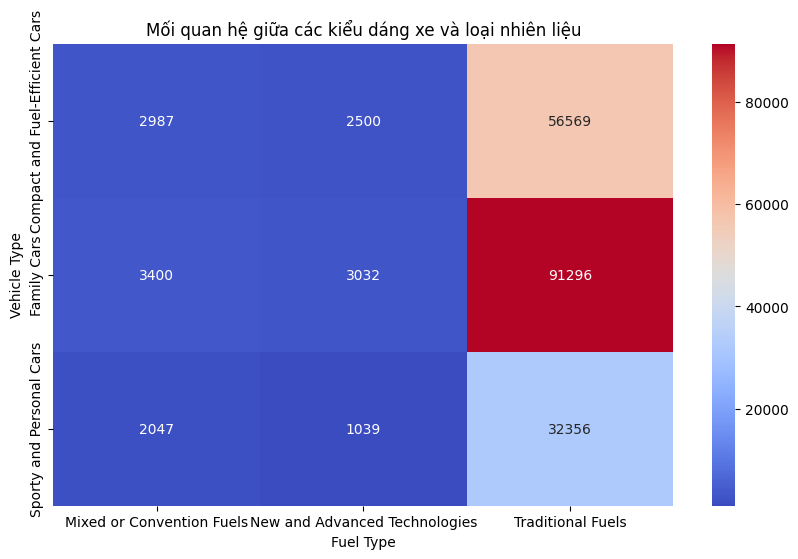

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo contingency table
contingency_table = pd.crosstab(df_type['Type'], df_fuel['Fuel_type'])

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt='d', cbar=True)

# Thiết lập tiêu đề và nhãn trục
plt.title('Mối quan hệ giữa các kiểu dáng xe và loại nhiên liệu')
plt.xlabel('Fuel Type')
plt.ylabel('Vehicle Type')

# Hiển thị biểu đồ
plt.show()

##### Giả thuyết 6: Không có sự liên quan giữa loại hộp số và hệ thống dẫn động của xe.
H0: Loại hộp số và hệ thống dẫn động của xe là Độc Lập

H1: Loại hộp số và hệ thống dẫn động của xe là Phụ Thuộc lẫn nhau

In [ ]:
df_drive = df.copy()

In [ ]:
df_drive['Drive'] = df_drive['Drive'].replace({
    'Front wheels': 'Front wheels',
    'Rear wheels': 'Rear wheels',
    '4x4 (attached automatically)': '4x4',
    '4x4 (permanent)': '4x4',
    '4x4 (attached manually)': '4x4'
})

In [ ]:
crosstab_table = pd.crosstab(df_drive['Drive'], df_drive['Transmission'])
crosstab_table

Transmission  Automatic  Manual
Drive                          
4x4               19826    7015
Front wheels      34442  119066
Rear wheels        8223    6654

In [ ]:
contingency_table = pd.crosstab(df_drive['Drive'], df['Transmission'])
# Kiểm định chi-squared
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Giá trị p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print(f'Trị số p = {p_value} < {alpha}',
     'nên bác bỏ H0\n => Loại hộp số và hệ thống dẫn động của xe là Phụ Thuộc lẫn nhau')
else:
    print(f'Trị số p = {p_value} >= {alpha}',
      'nên không bác bỏ H0\n => Loại hộp số và hệ thống dẫn động của xe là Độc Lập')

Chi-squared statistic: 31769.034585851827
Giá trị p: 0.0
Trị số p = 0.0 < 0.05 nên bác bỏ H0
 => Loại hộp số và hệ thống dẫn động của xe là Phụ Thuộc lẫn nhau


<Figure size 1000x600 with 0 Axes>

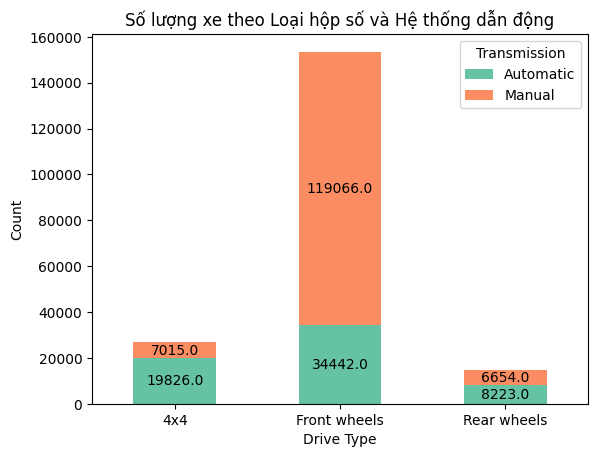

In [ ]:
df_stacked = df_drive.pivot_table(index='Drive', columns='Transmission', aggfunc='size', fill_value=0)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
ax = df_stacked.plot(kind='bar', stacked=True, color=sns.color_palette('Set2', n_colors=len(df_stacked.columns)))
plt.title('Số lượng xe theo Loại hộp số và Hệ thống dẫn động')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.legend(title='Transmission')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

##### Giả thuyết 7: Không có sự liên quan giữa kiểu dáng của xe và các khu vực
H0: Kiểu dáng của xe và các khu vực là Độc Lập

H1: Kiểu dáng của xe và các khu vực là Phụ Thuộc lẫn nhau.

In [ ]:
crosstab_table = pd.crosstab(df_type['Type'], df['Offer_region'])
crosstab_table

Offer_region                     Central  East  North  South   West
Type                                                               
Compact and Fuel-Efficient Cars    12676  3212   8731  23731  13706
Family Cars                        21911  5899  14581  35456  19881
Sporty and Personal Cars            9017  2424   5287  11925   6789

In [ ]:
contingency_table = pd.crosstab(df_type['Type'], df['Offer_region'])
# Kiểm định chi bình phương
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'Giá trị p: {p_value}')

alpha = 0.05
if p_value < alpha:
  print(f'Trị số p = {p_value} < {alpha}',
     'nên bác bỏ H0\n => Kiểu dáng của xe và các khu vực là Phụ Thuộc lẫn nhau')
else:
  print(f'Trị số p = {p_value} >= {alpha}',
    'nên không bác bỏ H0\n => Kiểu dáng của xe và các khu vực là Độc Lập')

Chi-squared statistic: 622.9650645158116
Giá trị p: 2.6989471975185646e-129
Trị số p = 2.6989471975185646e-129 < 0.05 nên bác bỏ H0
 => Kiểu dáng của xe và các khu vực là Phụ Thuộc lẫn nhau


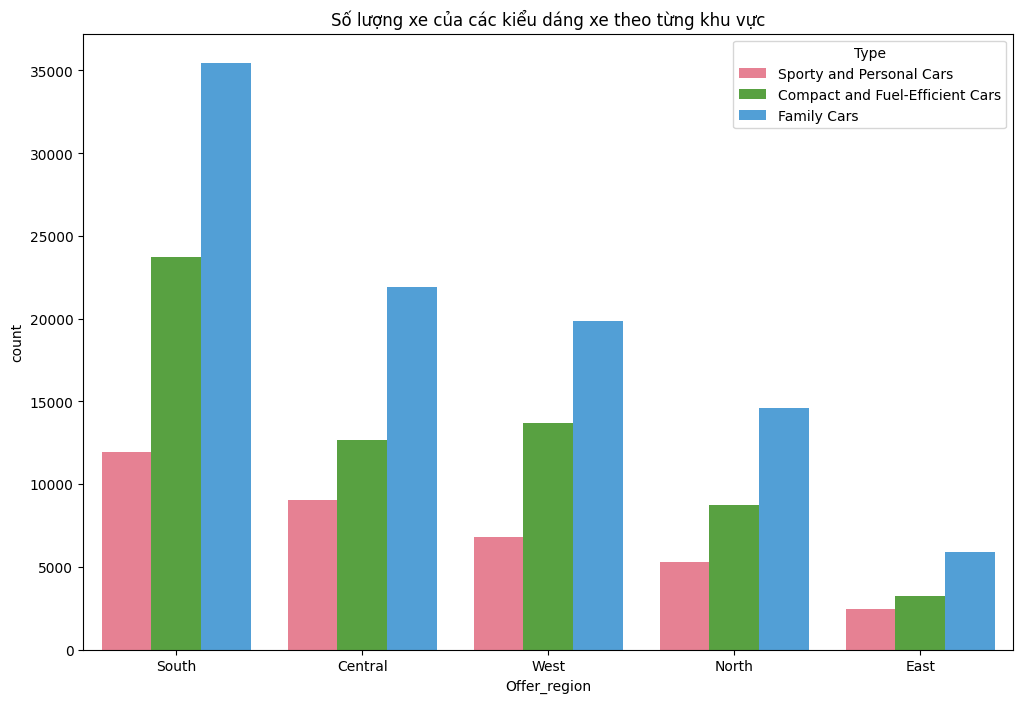

In [ ]:
offer_region_order = df['Offer_region'].value_counts().index

# Biểu đồ thể hiện mối quan hệ giữa kiểu dáng xe và các khu vực
plt.figure(figsize=(12, 8))
sns.countplot(x='Offer_region', hue='Type', data=df_type, palette='husl', order=offer_region_order, hue_order=df_type['Type'].value_counts().index[::-1])
plt.title('Số lượng xe của các kiểu dáng xe theo từng khu vực')

plt.show()


# ***5. HUẤN LUYỆN VÀ ĐÁNH GIÁ MÔ HÌNH***

## Linear Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

In [ ]:
df_copy1 = df_processed.copy()

In [ ]:
df_copy1.columns

Index(['Price', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour',
       'Offer_publication_date', 'Offer_location', 'Features'],
      dtype='object')

In [ ]:
selected_numerical_features = dtype_seperator(df_copy1,is_numeric=True)
selected_categorical_features = dtype_seperator(df_copy1,is_numeric=False)

In [ ]:
selected_numerical_features
selected_categorical_features = [col for col in selected_categorical_features if df_copy1[col].nunique() < 10]
print(selected_numerical_features)
print(selected_categorical_features)

['Price', 'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3']
['Condition', 'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number']


In [ ]:
X_features = selected_numerical_features + selected_categorical_features
df_copy1 = df_copy1[X_features]
df_copy1 = pd.get_dummies(df_copy1)

<ipython-input-139-e42b49c1d254>:3: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [ ]:
selected_numerical_features = [element for element in numerical_features if element != 'Price']

In [ ]:
scaler = MinMaxScaler()
df_copy1[selected_numerical_features] = scaler.fit_transform(df_copy1[selected_numerical_features])

In [ ]:
X1 = df_copy1.drop('Price',axis=1)
y1 = df_copy1['Price']

In [ ]:
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X1, y1, test_size=0.3, random_state=1)
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_temp1, y_temp1, test_size=0.5, random_state=1)

# Khởi tạo mô hình Linear Regression
linear_reg = LinearRegression()

# Huấn luyện mô hình
linear_reg.fit(X_train1, y_train1)

# Dự đoán trên tập kiểm thử và tập validation
y_pred_test_lr = linear_reg.predict(X_test1)
y_pred_val_lr = linear_reg.predict(X_val1)

In [ ]:
# Đánh giá trên tập kiểm thử
mae_test_lr = mean_absolute_error(y_test1, y_pred_test_lr)
mse_test_lr = mean_squared_error(y_test1, y_pred_test_lr)
r2_test_lr = r2_score(y_test1, y_pred_test_lr)
rmse_test_lr = mean_squared_error(y_test1, y_pred_test_lr, squared=False)

print('Đánh giá trên tập TEST:\n')
print('MAE on Test Set (Linear Regression):', round(mae_test_lr,2))
print('MSE on Test Set (Linear Regression):', round(mse_test_lr,2))
print('R2 Score on Test Set (Linear Regression): ', round(r2_test_lr,4))
print('RMSE on Test Set (Linear Regression): ', round(rmse_test_lr,2))

Đánh giá trên tập TEST:

MAE on Test Set (Linear Regression): 15958.72
MSE on Test Set (Linear Regression): 537331325.26
R2 Score on Test Set (Linear Regression):  0.7706
RMSE on Test Set (Linear Regression):  23180.41


In [ ]:
# Đánh giá trên tập VALIDATION
mae_val_lr = mean_absolute_error(y_val1, y_pred_val_lr)
mse_val_lr = mean_squared_error(y_val1, y_pred_val_lr)
r2_val_lr = r2_score(y_val1, y_pred_val_lr)
rmse_val_lr = mean_squared_error(y_val1, y_pred_val_lr, squared=False)

print('Đánh giá trên tập VALIDATION:\n')
print('MAE on Validation Set (Linear Regression): ', round(mae_val_lr,2))
print('MSE on Validation Set (Linear Regression): ', round(mse_val_lr, 2))
print('R2 Score on Validation Set (Linear Regression): ', round(r2_val_lr,4))
print('RMSE on Validation Set (Linear Regression): ', round(rmse_val_lr,2))

Đánh giá trên tập VALIDATION:

MAE on Validation Set (Linear Regression):  15949.7
MSE on Validation Set (Linear Regression):  532844503.19
R2 Score on Validation Set (Linear Regression):  0.7705
RMSE on Validation Set (Linear Regression):  23083.42


## Support Vector Regression

In [ ]:
df_copy3 = df_processed.copy()

In [ ]:
df_copy3 = df_copy3[X_features]
df_copy3 = pd.get_dummies(df_copy1)

In [ ]:
df_copy3[selected_numerical_features] = scaler.fit_transform(df_copy3[selected_numerical_features])

In [ ]:
svm_reg = SVR(kernel='linear')

# Huấn luyện mô hình
svm_reg.fit(X_train1, y_train1)

# Dự đoán trên tập kiểm thử và tập validation
y_pred_test_svr = svm_reg.predict(X_test1)
y_pred_val_svr= svm_reg.predict(X_val1)

In [ ]:
# Đánh giá trên tập TEST
mae_test_svr = mean_absolute_error(y_test1, y_pred_test_svr)
mse_test_svr = mean_squared_error(y_test1, y_pred_test_svr)
r2_test_svr = r2_score(y_test1, y_pred_test_svr)
rmse_test_svr = mean_squared_error(y_test1, y_pred_test_svr, squared=False)

print('Đánh giá trên tập TEST:\n')
print('MAE on Test Set (SVR):', round(mae_test_svr,2))
print('MSE on Test Set (SVR):', round(mse_test_svr,2))
print('R2 Score on Test Set (SVR): ', round(r2_test_svr,4))
print('RMSE on Test Set (SVR): ', round(rmse_test_svr,2))

Đánh giá trên tập TEST:

MAE on Test Set (SVR): 17771.93
MSE on Test Set (SVR): 1002550050.53
R2 Score on Test Set (SVR):  0.572
RMSE on Test Set (SVR):  31663.07


In [ ]:
# Đánh giá trên tập VALIDATION
mae_val_svr = mean_absolute_error(y_val1, y_pred_val_svr)
mse_val_svr = mean_squared_error(y_val1, y_pred_val_svr)
r2_val_svr = r2_score(y_val1, y_pred_val_svr)
rmse_val_svr = mean_squared_error(y_val1, y_pred_val_svr, squared=False)

print('Đánh giá trên tập VALIDATION:\n')
print('MAE on VALIDATION Set (SVR):', round(mae_val_svr,2))
print('MSE on VALIDATION (SVR):', round(mse_val_svr,2))
print('R2 Score on VALIDATION Set (SVR): ', round(r2_val_svr,4))
print('RMSE on VALIDATION Set (SVR): ', round(rmse_val_svr,2))

Đánh giá trên tập VALIDATION:

MAE on VALIDATION Set (SVR): 17531.59
MSE on VALIDATION (SVR): 969415095.42
R2 Score on VALIDATION Set (SVR):  0.5825
RMSE on VALIDATION Set (SVR):  31135.43


## Random Forest

In [ ]:
df_copy2 = df_processed.copy()

In [ ]:
df_copy2 = df_copy2[X_features]
df_copy2 = pd.get_dummies(df_copy2)

<ipython-input-153-a9fdd980bcaa>:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [ ]:
X2 = df_copy2.drop('Price',axis=1)
y2 = df_copy2['Price']

In [ ]:
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.3, random_state=1)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=1)

In [ ]:
# Khởi tạo mô hình RandomForest
random_forest_reg = RandomForestRegressor()

# Huấn luyện mô hình
random_forest_reg.fit(X_train2, y_train2)

# Dự đoán trên tập kiểm thử và tập validation
y_pred_test_rf = random_forest_reg.predict(X_test2)
y_pred_val_rf = random_forest_reg.predict(X_val2)

In [ ]:
# Đánh giá trên tập kiểm thử
mse_test_rf = mean_squared_error(y_test2, y_pred_test_rf)
r2_test_rf = r2_score(y_test2, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test2, y_pred_test_rf)
rmse_test_rf = mean_squared_error(y_test2, y_pred_test_rf, squared=False)

# In ra các thông số đánh giá
print('Đánh giá trên tập TEST: \n')
print('MSE on Test Set (Random Forest):', round(mse_test_rf,3))
print('MAE on Test Set (Random Forest):', round(mae_test_rf,3))
print('RMSE on Test Set (Random Forest):', round(rmse_test_rf,3))
print('R2 score on Test Set (Random Forest):', round(r2_test_rf,3))

Đánh giá trên tập TEST: 

MSE on Test Set (Random Forest): 173545472.315
MAE on Test Set (Random Forest): 7283.217
RMSE on Test Set (Random Forest): 13173.666
R2 score on Test Set (Random Forest): 0.926


In [ ]:
# Đánh giá trên tập validation
mse_val_rf = mean_squared_error(y_val2, y_pred_val_rf)
r2_val_rf = r2_score(y_val2, y_pred_val_rf)
mae_val_rf = mean_absolute_error(y_val2, y_pred_val_rf)
rmse_val_rf = mean_squared_error(y_val2, y_pred_val_rf, squared=False)

print('Đánh giá trên tập VALIDATION: \n')
print('MSE on Validation Set (Random Forest):', round(mse_val_rf,3))
print('MAE on Validation Set (Random Forest):', round(mae_val_rf,3))
print('RMSE on Validation Set (Random Forest):', round(rmse_val_rf,3))
print('R2 on Validation Set (Random Forest):', round(r2_val_rf,3))

Đánh giá trên tập VALIDATION: 

MSE on Validation Set (Random Forest): 168874484.335
MAE on Validation Set (Random Forest): 7137.153
RMSE on Validation Set (Random Forest): 12995.172
R2 on Validation Set (Random Forest): 0.927


## Biểu diễn trực quan đối chiếu

In [ ]:
eval_stat_test_df = pd.DataFrame({"MAE": [mae_test_lr, mae_test_svr, mae_test_rf],
              "MSE": [mse_test_lr, mse_test_svr, mse_test_rf],
              "RMSE": [rmse_test_lr, rmse_test_svr, rmse_test_rf],
              "R2": [r2_test_lr, r2_test_svr, r2_test_rf]}, index = ['Linear Regression', 'SVR', 'Random Forest'])

In [ ]:
print( "Các chỉ số đánh giá trên tập test: \n")
round(eval_stat_test_df,4)

Các chỉ số đánh giá trên tập test: 



MAE           MSE        RMSE      R2
Linear Regression  15958.7165  5.373313e+08  23180.4082  0.7706
SVR                17771.9285  1.002550e+09  31663.0708  0.5720
Random Forest       7283.2166  1.735455e+08  13173.6659  0.9259

In [ ]:
eval_stat_val_df = pd.DataFrame({"MAE": [mae_val_lr, mae_val_svr, mae_val_rf],
              "MSE": [mse_val_lr, mse_val_svr, mse_val_rf],
              "RMSE": [rmse_val_lr, rmse_val_svr, rmse_val_rf],
              "R2": [r2_val_lr, r2_val_svr, r2_val_rf]}, index = ['Linear Regression', 'SVR', 'Random Forest'])

In [ ]:
print( "Các chỉ số đánh giá trên tập validation: \n")
round(eval_stat_val_df,4)

Các chỉ số đánh giá trên tập validation: 



MAE           MSE        RMSE      R2
Linear Regression  15949.7011  5.328445e+08  23083.4249  0.7705
SVR                17531.5904  9.694151e+08  31135.4315  0.5825
Random Forest       7137.1529  1.688745e+08  12995.1716  0.9273

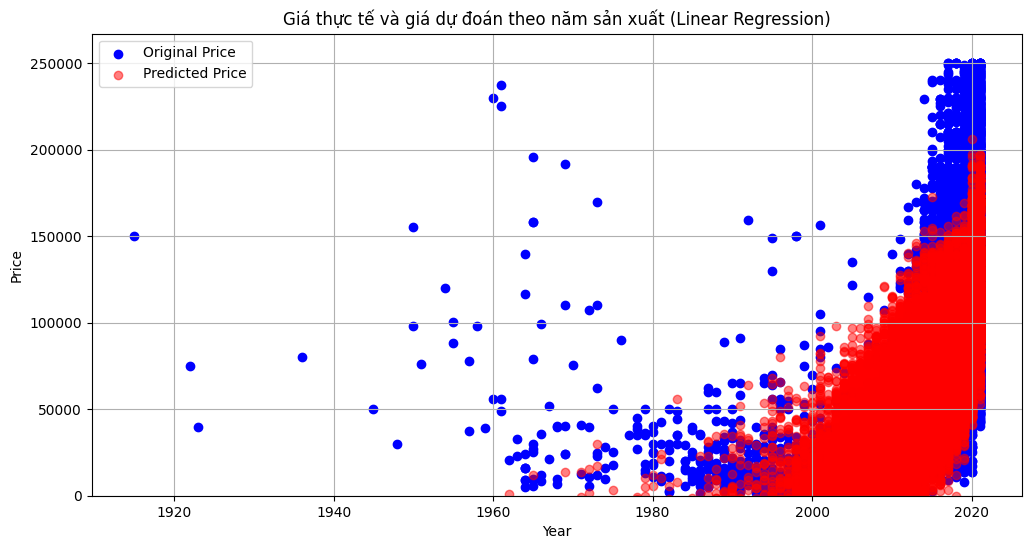

In [ ]:
year_values = df.loc[X_test1.index, 'Production_year']
plt.figure(figsize=(12, 6))
plt.scatter(year_values, y_test1, label='Original Price',color='blue')
plt.scatter(year_values, y_pred_test_lr, label='Predicted Price', color='red',alpha=0.5)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Giá thực tế và giá dự đoán theo năm sản xuất (Linear Regression)')
# Add a legend
plt.legend()
plt.ylim(bottom=0)

# Show the plot
plt.grid()

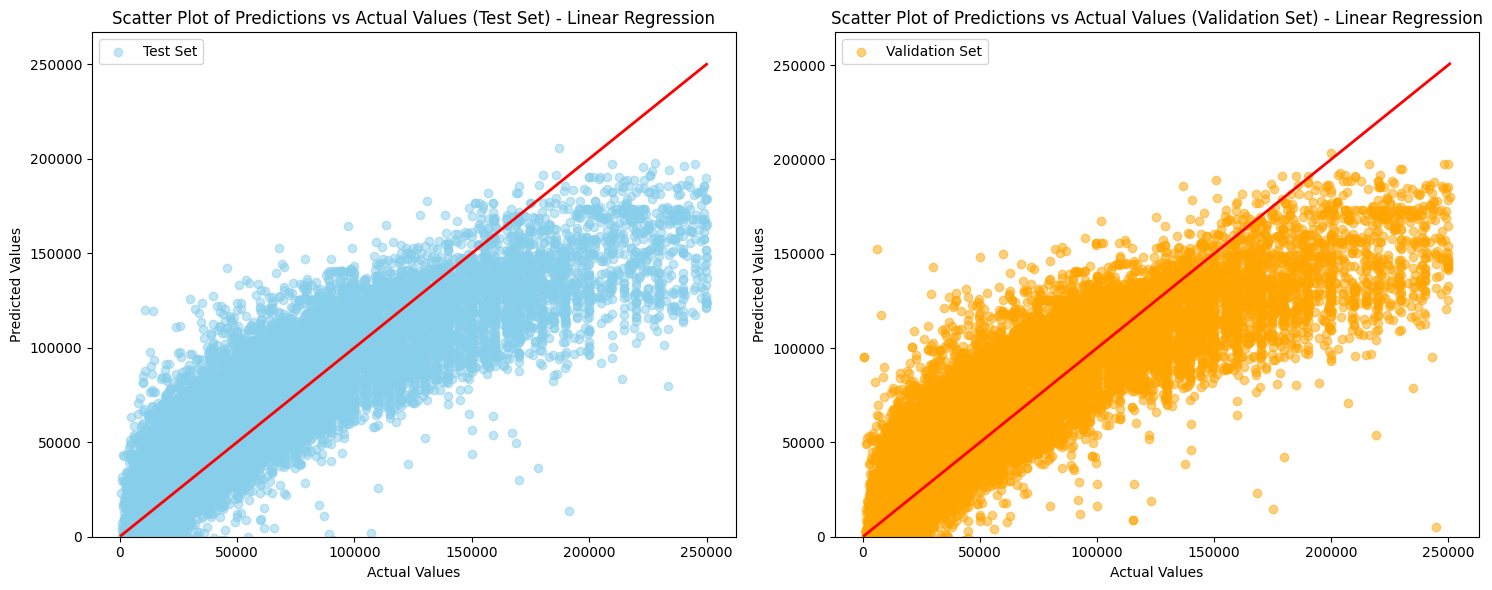

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].scatter(y_test1, y_pred_test_lr, alpha=0.5, label='Test Set', color='skyblue')
axes[0].set_title('Scatter Plot of Predictions vs Actual Values (Test Set) - Linear Regression')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='-', linewidth=2)
axes[0].set_ylim(bottom=0)
axes[0].legend()

# Scatter plot cho tập validation
axes[1].scatter(y_val1, y_pred_val_lr, alpha=0.5, label='Validation Set', color='orange')
axes[1].set_title('Scatter Plot of Predictions vs Actual Values (Validation Set) - Linear Regression')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].plot([min(y_val1), max(y_val1)], [min(y_val1), max(y_val1)], color='red', linestyle='-', linewidth=2)
axes[1].set_ylim(bottom=0)
axes[1].legend()

plt.tight_layout()
plt.show()

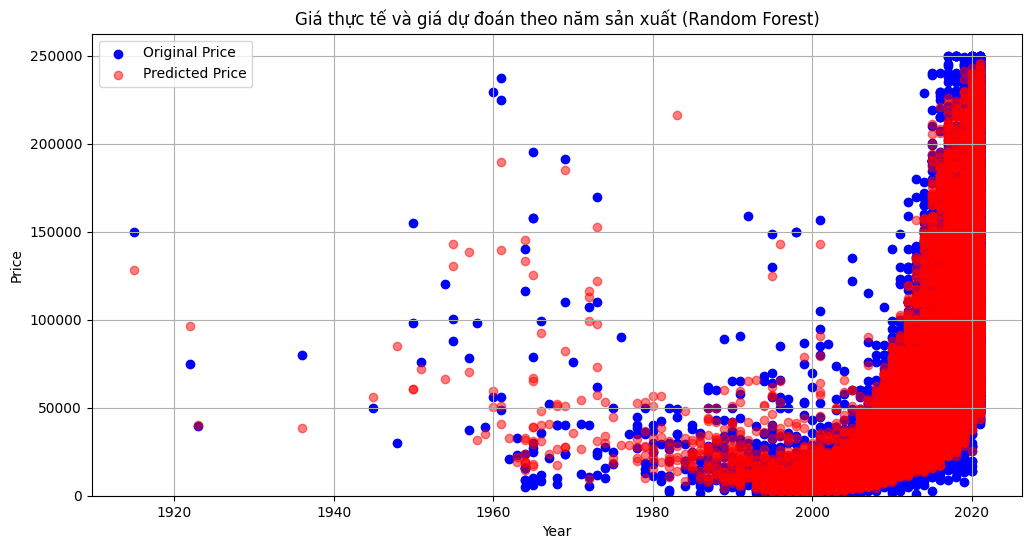

In [ ]:
# Extract 'Year' from the original DataFrame
year_values = df.loc[X_test2.index, 'Production_year']

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))
plt.scatter(year_values, y_test2, label='Original Price',color='blue')
plt.scatter(year_values, y_pred_test_rf, label='Predicted Price', color='red',alpha=0.5)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Giá thực tế và giá dự đoán theo năm sản xuất (Random Forest)')
# Add a legend
plt.legend()
plt.ylim(bottom=0)

# Show the plot
plt.grid()
plt.show()

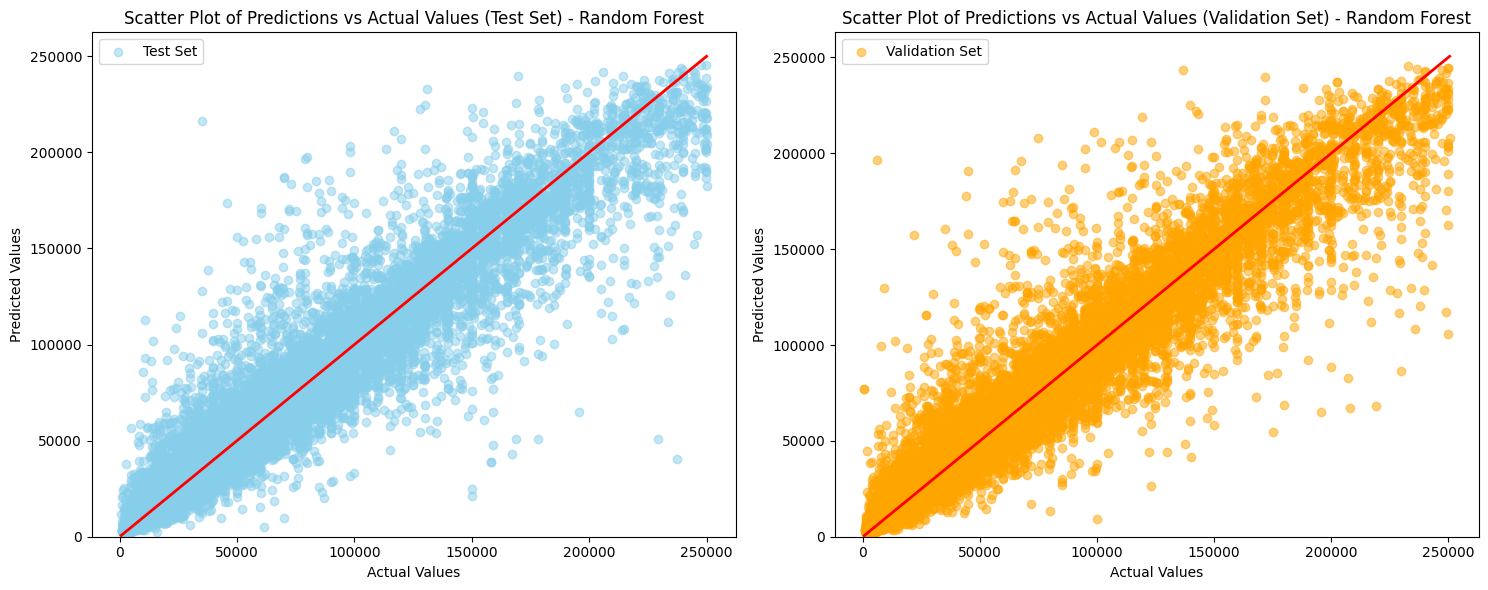

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].scatter(y_test2, y_pred_test_rf, alpha=0.5, label='Test Set', color='skyblue')
axes[0].set_title('Scatter Plot of Predictions vs Actual Values (Test Set) - Random Forest')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='-', linewidth=2)
axes[0].set_ylim(bottom=0)
axes[0].legend()

# Scatter plot cho tập validation
axes[1].scatter(y_val2, y_pred_val_rf, alpha=0.5, label='Validation Set', color='orange')
axes[1].set_title('Scatter Plot of Predictions vs Actual Values (Validation Set) - Random Forest')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].plot([min(y_val2), max(y_val2)], [min(y_val2), max(y_val2)], color='red', linestyle='-', linewidth=2)
axes[1].set_ylim(bottom=0)
axes[1].legend()

plt.tight_layout()
plt.show()

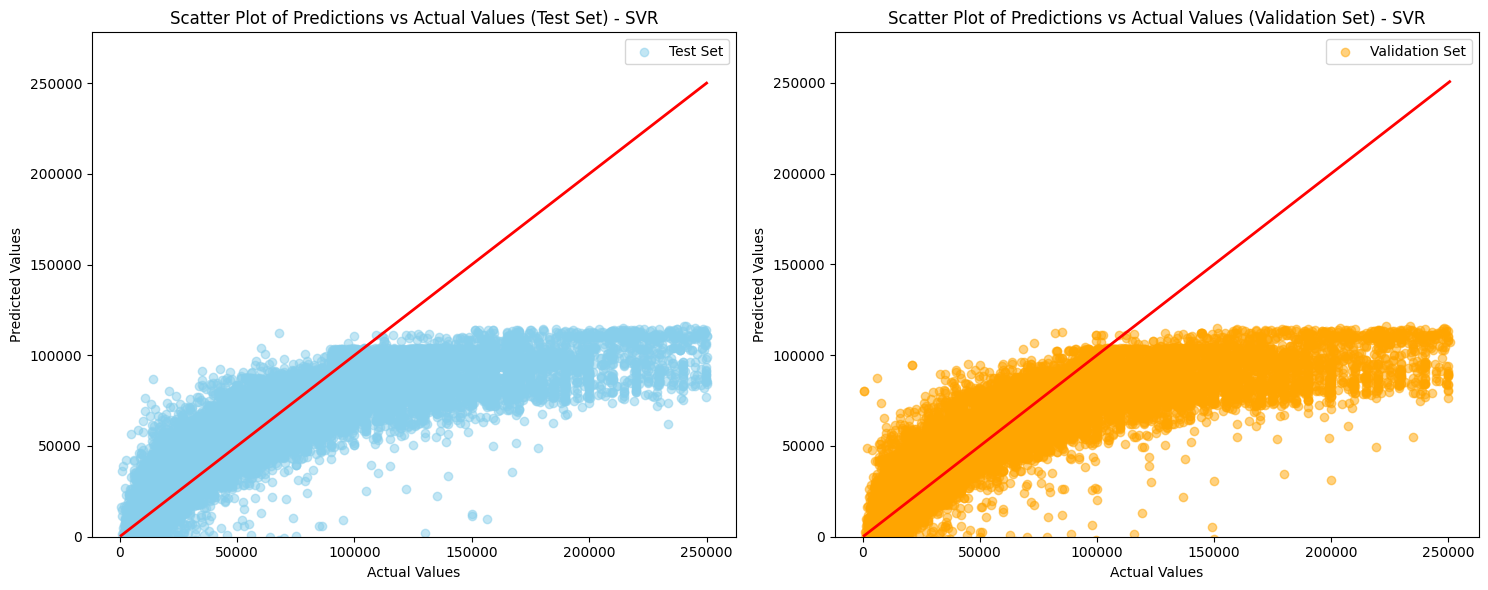

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].scatter(y_test1, y_pred_test_svr, alpha=0.5, label='Test Set', color='skyblue')
axes[0].set_title('Scatter Plot of Predictions vs Actual Values (Test Set) - SVR')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='-', linewidth=2)
axes[0].set_ylim(bottom=0)
axes[0].legend()

# Scatter plot cho tập validation
axes[1].scatter(y_val1, y_pred_val_svr, alpha=0.5, label='Validation Set', color='orange')
axes[1].set_title('Scatter Plot of Predictions vs Actual Values (Validation Set) - SVR')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].plot([min(y_val1), max(y_val1)], [min(y_val1), max(y_val1)], color='red', linestyle='-', linewidth=2)
axes[1].set_ylim(bottom=0)
axes[1].legend()

plt.tight_layout()
plt.show()

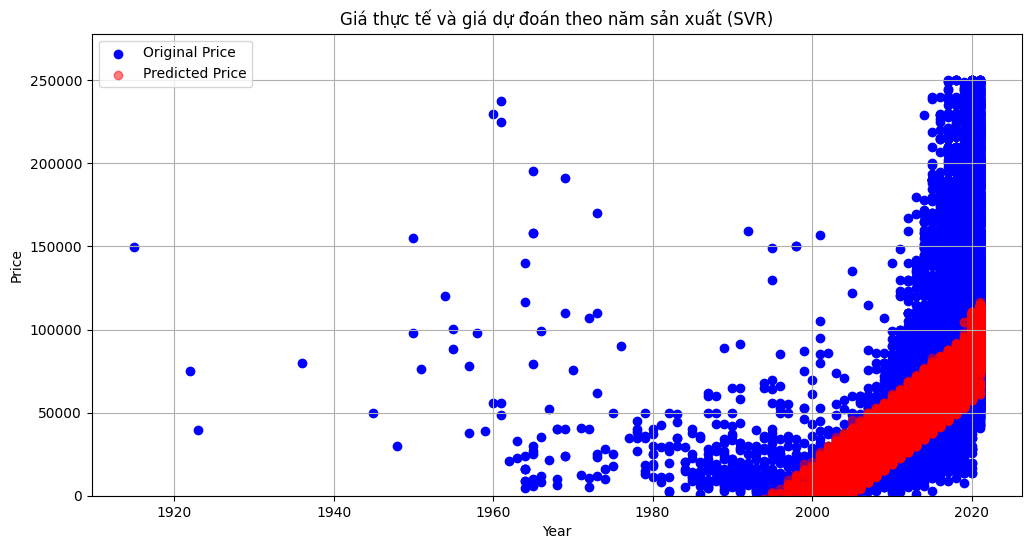

In [ ]:
year_values = df.loc[X_test1.index, 'Production_year']
plt.figure(figsize=(12, 6))
plt.scatter(year_values, y_test1, label='Original Price',color='blue')
plt.scatter(year_values, y_pred_test_svr, label='Predicted Price', color='red',alpha=0.5)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Giá thực tế và giá dự đoán theo năm sản xuất (SVR)')

# Add a legend
plt.legend()
plt.ylim(bottom=0)

# Show the plot
plt.grid()
plt.show()